# proto_tb_ana.ipynb

In this notebook, I will analyze simulation data from the prototype detector as well as actual data from run 310 of the testbeam. All datasets will deal with 3 GeV pions. For the sim data, the pions were shot through only the Hcal. I believe this is the same for the actual data, but I could be mistaken.

As of 8/19/22, this notebook is also a good example of how to use many of my functions in the file `analysis_funcs.py`. The previous notebook `100k_notebook.ipynb` has outdated uses of some functions and should not be used as a primary resource.

## Import analysis functions

In [1]:
from analysis_funcs import *

## Load data

Each dataset of the sim data contains 8000 events. There are two things that were not held constant between datasets &mdash; the version of Geant4 software, and whether or not a patch was made to this software.

The patch consists of a redefinition of isotopes in the steel absorber as well as in the scintillator. To perform the patch, find each element `X` in [these lines](https://github.com/LDMX-Software/ldmx-sw/blob/1c446d243d4ac451d9e790c632c2749ff3aeeb07/Detectors/data/ldmx-det-v12/hcal.gdml#L149-L162) and change `ref=X` to `ref=G4_X`. The naming scheme for this patch is an artifact from the development stage in which only the steel was known to have needed redefining.

Therefore, there are 4 sim datasets, which have the following endings on their array names:
* Geant4.10.2 (latest), no patch: **2proto**
* Geant4.10.2 (latest), patch: **2protofe**
* Geant4.10.7, no patch: **7proto**
* Geant4.10.7, patch: **7protofe**

Each dataset of the testbeam data contains 125547 events. While raw data from only one run (run 310) was used, there are two different processed datasets, which arise from a change in the file `hcal_testbeam0422conditions.py` used during processing. In the original version, [this line](https://github.com/LDMX-Software/Hcal/blob/ae00f7329869102e3bb8c1427573fa76d0b4523a/python/hcal_testbeam0422_conditions.py#L25) contained `v1_0_0`, while in the new version this line contains `v1_1_0`.

The two testbeam datasets have the following array name endings:
* v1_0_0: **tb0**
* v1_1_0: **tb1**

The following cuts were applied to the hits in both the sim and the testbeam data:
* filter out energies with values of NaN and inf/-inf
* constrain to hits that produced photoelectrons in the range of $[5,816]$
    * the lower bound eliminates the vast majority of the scintillator noise effect
    * the upper bound eliminates nonsensically high energy readings (those above 6 MIPs of energy, where $2 (double-ended) * 6 (MIPs) * 68 (PE/MeV) = 816$)
* filter out hits from bad channels
    * layer 4, strip 5
    * layer 19, strip 1
    * layer 19, strip 3

In [2]:
import pickle

# ('p3' indicates that 3 GeV pions were used)
# simulation data
dict_p32proto = pickle.load(open('../pickle_files/pion18_8000_3GeV_g2prototb.pkl', 'rb'))
rechitPE_p32proto = dict_p32proto['rechitPE']
sumPE_p32proto = dict_p32proto['sumPE']
xcoords_p32proto = dict_p32proto['xcoords']
ycoords_p32proto = dict_p32proto['ycoords']
layernum_p32proto = dict_p32proto['layernum']
minLayerWithHit_p32proto = dict_p32proto['minLayerWithHit']
minLayerWithHit5_p32proto = dict_p32proto['minLayerWithHit5']
maxPEhit_p32proto = dict_p32proto['maxPEhit']
binenergy_p32proto = dict_p32proto['binenergy']
binhits_p32proto = dict_p32proto['binhits']

dict_p32protofe = pickle.load(open('../pickle_files/pion18_8000_3GeV_g2protofetb.pkl', 'rb'))
rechitPE_p32protofe = dict_p32protofe['rechitPE']
sumPE_p32protofe = dict_p32protofe['sumPE']
xcoords_p32protofe = dict_p32protofe['xcoords']
ycoords_p32protofe = dict_p32protofe['ycoords']
layernum_p32protofe = dict_p32protofe['layernum']
minLayerWithHit_p32protofe = dict_p32protofe['minLayerWithHit']
minLayerWithHit5_p32protofe = dict_p32protofe['minLayerWithHit5']
maxPEhit_p32protofe = dict_p32protofe['maxPEhit']
binenergy_p32protofe = dict_p32protofe['binenergy']
binhits_p32protofe = dict_p32protofe['binhits']

dict_p37proto = pickle.load(open('../pickle_files/pion18_8000_3GeV_g7prototb.pkl', 'rb'))
rechitPE_p37proto = dict_p37proto['rechitPE']
sumPE_p37proto = dict_p37proto['sumPE']
xcoords_p37proto = dict_p37proto['xcoords']
ycoords_p37proto = dict_p37proto['ycoords']
layernum_p37proto = dict_p37proto['layernum']
minLayerWithHit_p37proto = dict_p37proto['minLayerWithHit']
minLayerWithHit5_p37proto = dict_p37proto['minLayerWithHit5']
maxPEhit_p37proto = dict_p37proto['maxPEhit']
binenergy_p37proto = dict_p37proto['binenergy']
binhits_p37proto = dict_p37proto['binhits']

dict_p37protofe = pickle.load(open('../pickle_files/pion18_8000_3GeV_g7protofetb.pkl', 'rb'))
rechitPE_p37protofe = dict_p37protofe['rechitPE']
sumPE_p37protofe = dict_p37protofe['sumPE']
xcoords_p37protofe = dict_p37protofe['xcoords']
ycoords_p37protofe = dict_p37protofe['ycoords']
layernum_p37protofe = dict_p37protofe['layernum']
minLayerWithHit_p37protofe = dict_p37protofe['minLayerWithHit']
minLayerWithHit5_p37protofe = dict_p37protofe['minLayerWithHit5']
maxPEhit_p37protofe = dict_p37protofe['maxPEhit']
binenergy_p37protofe = dict_p37protofe['binenergy']
binhits_p37protofe = dict_p37protofe['binhits']


# testbeam data
dict_p3tb0 = pickle.load(open('../pickle_files/piontestbeam_3GeV_310.pkl', 'rb'))
rechitPE_p3tb0 = dict_p3tb0['rechitPE']
sumPE_p3tb0 = dict_p3tb0['sumPE']
xcoords_p3tb0 = dict_p3tb0['xcoords']
ycoords_p3tb0 = dict_p3tb0['ycoords']
layernum_p3tb0 = dict_p3tb0['layernum']
minLayerWithHit_p3tb0 = dict_p3tb0['minLayerWithHit']
minLayerWithHit5_p3tb0 = dict_p3tb0['minLayerWithHit5']
maxPEhit_p3tb0 = dict_p3tb0['maxPEhit']
binenergy_p3tb0 = dict_p3tb0['binenergy']
binhits_p3tb0 = dict_p3tb0['binhits']

dict_p3tb1 = pickle.load(open('../pickle_files/piontestbeam_3GeV_310v1.pkl', 'rb'))
rechitPE_p3tb1 = dict_p3tb1['rechitPE']
sumPE_p3tb1 = dict_p3tb1['sumPE']
xcoords_p3tb1 = dict_p3tb1['xcoords']
ycoords_p3tb1 = dict_p3tb1['ycoords']
layernum_p3tb1 = dict_p3tb1['layernum']
minLayerWithHit_p3tb1 = dict_p3tb1['minLayerWithHit']
minLayerWithHit5_p3tb1 = dict_p3tb1['minLayerWithHit5']
maxPEhit_p3tb1 = dict_p3tb1['maxPEhit']
binenergy_p3tb1 = dict_p3tb1['binenergy']
binhits_p3tb1 = dict_p3tb1['binhits']

In [3]:
# cut where only hits that produced [200,400] PEs were included

# simulation data
dict_p32proto24 = pickle.load(open('../pickle_files/pion18_8000_3GeV_g2prototb_2-4.pkl', 'rb'))
rechitPE_p32proto24 = dict_p32proto24['rechitPE']
sumPE_p32proto24 = dict_p32proto24['sumPE']
xcoords_p32proto24 = dict_p32proto24['xcoords']
ycoords_p32proto24 = dict_p32proto24['ycoords']
layernum_p32proto24 = dict_p32proto24['layernum']
minLayerWithHit_p32proto24 = dict_p32proto24['minLayerWithHit']
minLayerWithHit5_p32proto24 = dict_p32proto24['minLayerWithHit5']
maxPEhit_p32proto24 = dict_p32proto24['maxPEhit']
binenergy_p32proto24 = dict_p32proto24['binenergy']
binhits_p32proto24 = dict_p32proto24['binhits']

dict_p32protofe24 = pickle.load(open('../pickle_files/pion18_8000_3GeV_g2protofetb_2-4.pkl', 'rb'))
rechitPE_p32protofe24 = dict_p32protofe24['rechitPE']
sumPE_p32protofe24 = dict_p32protofe24['sumPE']
xcoords_p32protofe24 = dict_p32protofe24['xcoords']
ycoords_p32protofe24 = dict_p32protofe24['ycoords']
layernum_p32protofe24 = dict_p32protofe24['layernum']
minLayerWithHit_p32protofe24 = dict_p32protofe24['minLayerWithHit']
minLayerWithHit5_p32protofe24 = dict_p32protofe24['minLayerWithHit5']
maxPEhit_p32protofe24 = dict_p32protofe24['maxPEhit']
binenergy_p32protofe24 = dict_p32protofe24['binenergy']
binhits_p32protofe24 = dict_p32protofe24['binhits']

dict_p37proto24 = pickle.load(open('../pickle_files/pion18_8000_3GeV_g7prototb_2-4.pkl', 'rb'))
rechitPE_p37proto24 = dict_p37proto24['rechitPE']
sumPE_p37proto24 = dict_p37proto24['sumPE']
xcoords_p37proto24 = dict_p37proto24['xcoords']
ycoords_p37proto24 = dict_p37proto24['ycoords']
layernum_p37proto24 = dict_p37proto24['layernum']
minLayerWithHit_p37proto24 = dict_p37proto24['minLayerWithHit']
minLayerWithHit5_p37proto24 = dict_p37proto24['minLayerWithHit5']
maxPEhit_p37proto24 = dict_p37proto24['maxPEhit']
binenergy_p37proto24 = dict_p37proto24['binenergy']
binhits_p37proto24 = dict_p37proto24['binhits']

dict_p37protofe24 = pickle.load(open('../pickle_files/pion18_8000_3GeV_g7protofetb_2-4.pkl', 'rb'))
rechitPE_p37protofe24 = dict_p37protofe24['rechitPE']
sumPE_p37protofe24 = dict_p37protofe24['sumPE']
xcoords_p37protofe24 = dict_p37protofe24['xcoords']
ycoords_p37protofe24 = dict_p37protofe24['ycoords']
layernum_p37protofe24 = dict_p37protofe24['layernum']
minLayerWithHit_p37protofe24 = dict_p37protofe24['minLayerWithHit']
minLayerWithHit5_p37protofe24 = dict_p37protofe24['minLayerWithHit5']
maxPEhit_p37protofe24 = dict_p37protofe24['maxPEhit']
binenergy_p37protofe24 = dict_p37protofe24['binenergy']
binhits_p37protofe24 = dict_p37protofe24['binhits']


# testbeam data
dict_p3tb024 = pickle.load(open('../pickle_files/piontestbeam_3GeV_310_2-4.pkl', 'rb'))
rechitPE_p3tb024 = dict_p3tb024['rechitPE']
sumPE_p3tb024 = dict_p3tb024['sumPE']
xcoords_p3tb024 = dict_p3tb024['xcoords']
ycoords_p3tb024 = dict_p3tb024['ycoords']
layernum_p3tb024 = dict_p3tb024['layernum']
minLayerWithHit_p3tb024 = dict_p3tb024['minLayerWithHit']
minLayerWithHit5_p3tb024 = dict_p3tb024['minLayerWithHit5']
maxPEhit_p3tb024 = dict_p3tb024['maxPEhit']
binenergy_p3tb024 = dict_p3tb024['binenergy']
binhits_p3tb024 = dict_p3tb024['binhits']

dict_p3tb124 = pickle.load(open('../pickle_files/piontestbeam_3GeV_310v1_2-4.pkl', 'rb'))
rechitPE_p3tb124 = dict_p3tb124['rechitPE']
sumPE_p3tb124 = dict_p3tb124['sumPE']
xcoords_p3tb124 = dict_p3tb124['xcoords']
ycoords_p3tb124 = dict_p3tb124['ycoords']
layernum_p3tb124 = dict_p3tb124['layernum']
minLayerWithHit_p3tb124 = dict_p3tb124['minLayerWithHit']
minLayerWithHit5_p3tb124 = dict_p3tb124['minLayerWithHit5']
maxPEhit_p3tb124 = dict_p3tb124['maxPEhit']
binenergy_p3tb124 = dict_p3tb124['binenergy']
binhits_p3tb124 = dict_p3tb124['binhits']

## Examples of how to use each function in analysis_funcs.py

### hist1 - histogram of only one dataset

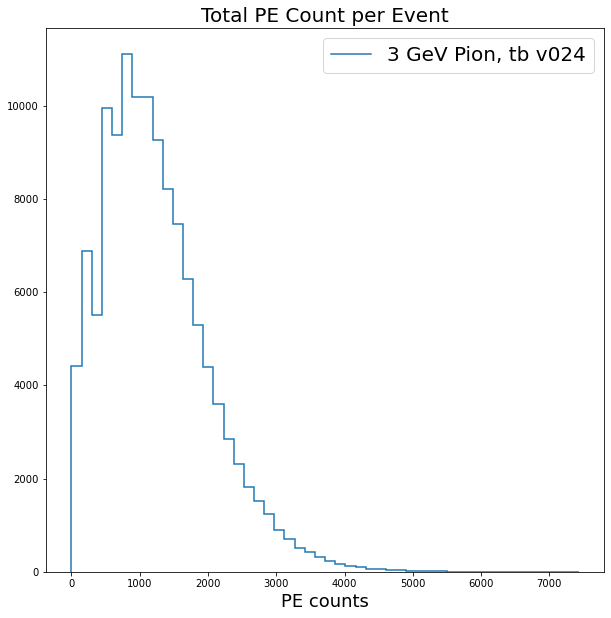

In [25]:
hist1(sumPE_p3tb024, 'Total PE Count per Event', '3 GeV Pion, tb v024',
      nbins=50, xlabel='PE counts')

### calc_bins_multi(/calc_bins) - returns best binning to use when histogramming multiple(/two) datasets

calc_bins has a narrower functionality and is more outdated, so using calc_bins_multi is advised.

In [32]:
b = calc_bins_multi([rechitPE_p32proto, rechitPE_p32protofe, rechitPE_p37proto,
                     rechitPE_p37protofe, rechitPE_p3tb0, rechitPE_p3tb1],
                    nbins=50)
print(b)

[  5.   14.7  24.4  34.1  43.8  53.5  63.2  72.9  82.6  92.3 102.  111.7
 121.4 131.1 140.8 150.5 160.2 169.9 179.6 189.3 199.  208.7 218.4 228.1
 237.8 247.5 257.2 266.9 276.6 286.3 296.  305.7 315.4 325.1 334.8 344.5
 354.2 363.9 373.6 383.3 393.  402.7 412.4 422.1 431.8 441.5 451.2 460.9
 470.6 480.3 490.  499.7 509.4 519.1 528.8 538.5 548.2 557.9 567.6 577.3
 587.  596.7 606.4 616.1 625.8 635.5 645.2 654.9 664.6 674.3 684.  693.7
 703.4 713.1 722.8 732.5 742.2 751.9 761.6 771.3 781.  790.7 800.4 810.1
 819.8]


### hists - histogram of multiple datasets

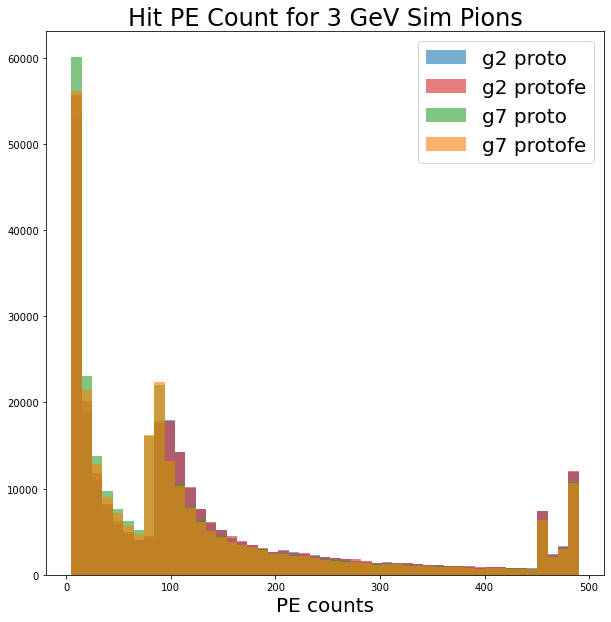

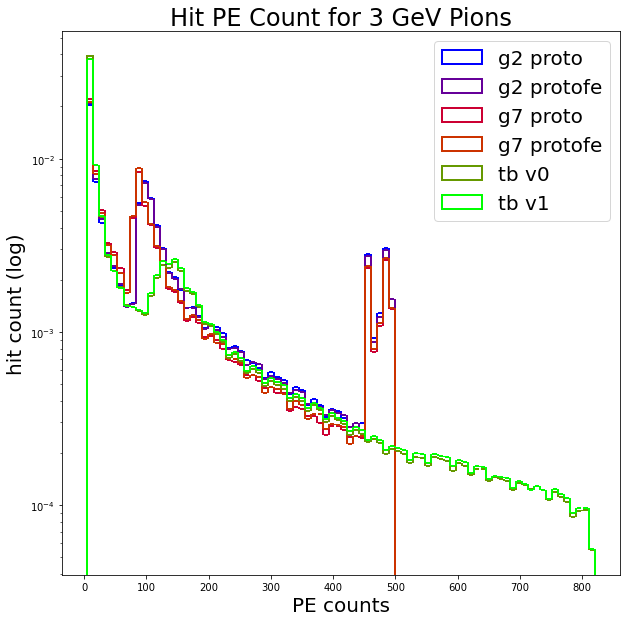

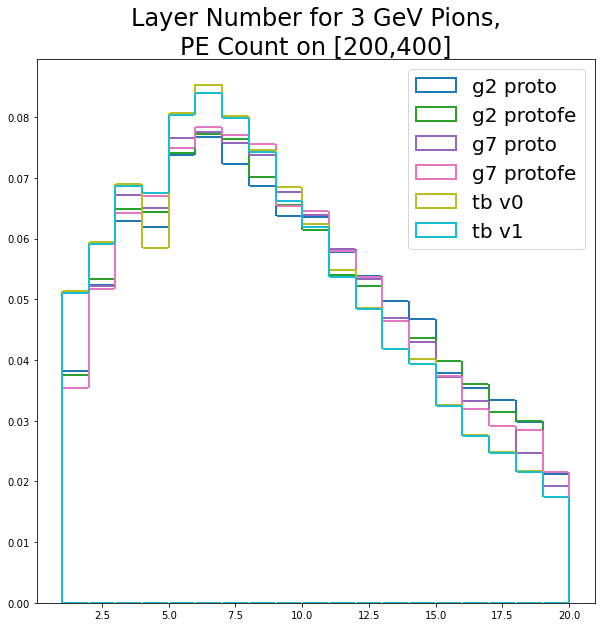

In [44]:
hists([rechitPE_p32proto, rechitPE_p32protofe, rechitPE_p37proto,
       rechitPE_p37protofe], 'Hit PE Count for 3 GeV Sim Pions',
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe'], nbins=50,
      colors=['tab:blue', 'tab:red', 'tab:green', 'tab:orange'],
      edge=False, xlabel='PE counts')


hists([rechitPE_p32proto, rechitPE_p32protofe, rechitPE_p37proto,
       rechitPE_p37protofe, rechitPE_p3tb0, rechitPE_p3tb1], 
      'Hit PE Count for 3 GeV Pions',
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe',
       'tb v0', 'tb v1'], nbins=b, density=True, xlabel='PE counts',
      colors='brg', yscale='log', ylabel='hit count (log)')

hists([layernum_p32proto24, layernum_p32protofe24, layernum_p37proto24,
       layernum_p37protofe24, layernum_p3tb024, layernum_p3tb124], 
      'Layer Number for 3 GeV Pions,\nPE Count on [200,400]', ['g2 proto', 'g2 protofe', 
      'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'], 
      nbins=np.linspace(1,20,20), density=True)

### scatter1 - 2D scatterplot of one dataset

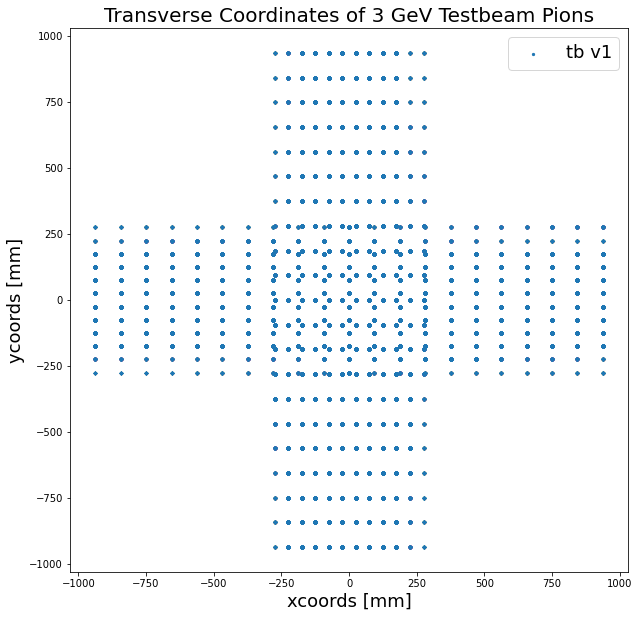

In [42]:
scatter1(xcoords_p3tb1, ycoords_p3tb1, 
         'Transverse Coordinates of 3 GeV Testbeam Pions',
        'xcoords [mm]', 'ycoords [mm]', 'tb v1', loc=1, s=5)

### scatter_multi - 2D scatterplot of multiple datasets

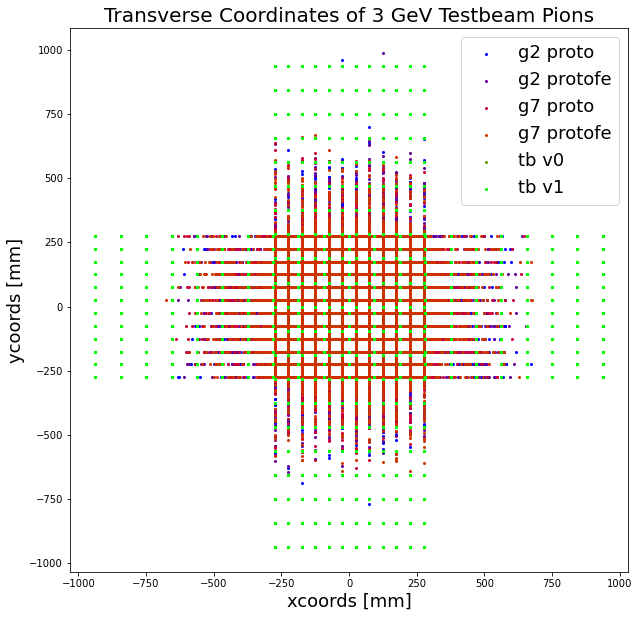

In [48]:
scatter_multi([xcoords_p32proto, xcoords_p32protofe, xcoords_p37proto,
               xcoords_p37protofe, xcoords_p3tb0, xcoords_p3tb1], 
              [ycoords_p32proto, ycoords_p32protofe, ycoords_p37proto,
               ycoords_p37protofe, ycoords_p3tb0, ycoords_p3tb1], 
              'Transverse Coordinates of 3 GeV Testbeam Pions',
              'xcoords [mm]', 'ycoords [mm]',
              ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe',
               'tb v0', 'tb v1'], loc=1, colors='brg', s=4)

### stats - shows various statistics about the input dataset

In [52]:
stats(rechitPE_p32proto, label='g2 proto', alll=True, maxlim=400, 
      nexthighest=4)

g2 proto

Length: 266754
Median: 97.0
Mean: 138.7101786664867
Standard deviation: 143.93280409196197


Minimum of distribution: 5.0
Number of elements with this minimum: 9821
10th percentile of distribution: 8.0


Maximum of distribution: 490.0
Number of elements with this maximum: 4019
90th percentile of distribution: 428.0

Next highest value is: 489.0
Number of elements with this value: 2178

Next highest value is: 488.0
Number of elements with this value: 1208

Next highest value is: 487.0
Number of elements with this value: 937

Next highest value is: 486.0
Number of elements with this value: 765

Number of elements above 400: 29116
Corresponding percentile: 0.8904983617865149




### prof_plot - plots profile plots of multiple datasets at the hits level

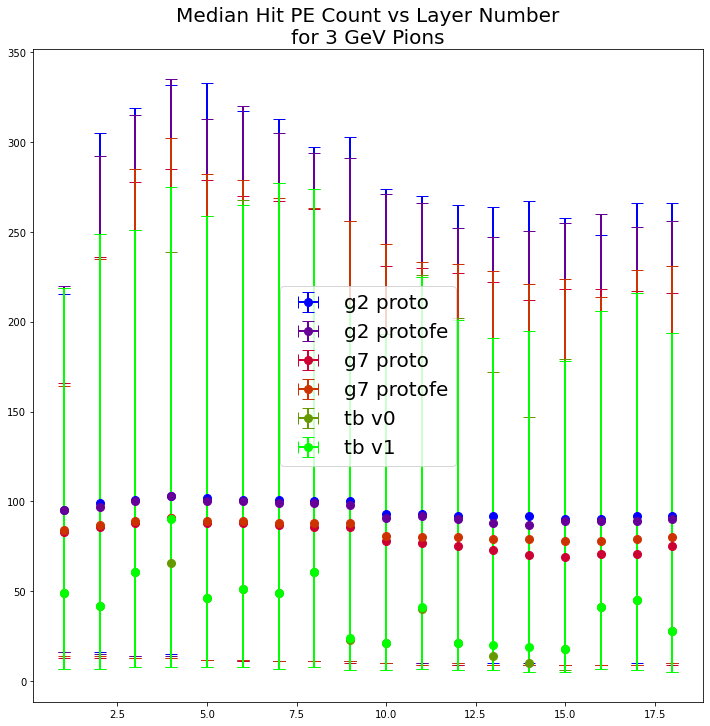

In [53]:
prof_plot([layernum_p32proto, layernum_p32protofe, layernum_p37proto, 
           layernum_p37protofe, layernum_p3tb0, layernum_p3tb1], [
           rechitPE_p32proto, rechitPE_p32protofe, rechitPE_p37proto, 
           rechitPE_p37protofe, rechitPE_p3tb0, rechitPE_p3tb1], ['g2 proto', 'g2 protofe',
           'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'], 
           title='Median Hit PE Count vs Layer Number\nfor 3 GeV Pions', 
           bins=np.linspace(1, 19, 19), colors='brg')

### prof_prep and ms_qs_graph - used in tandem to create profile plot at the events level

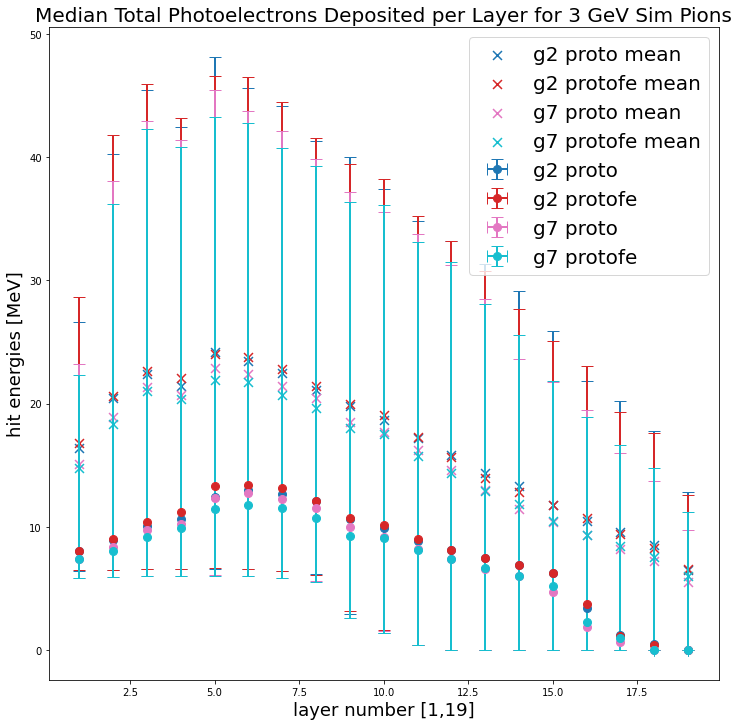

In [55]:
meds, qlows, qhighs, means = prof_prep([binenergy_p32proto, binenergy_p32protofe, 
                                        binenergy_p37proto, binenergy_p37protofe])

ms_qs_graph(meds, qlows, qhighs, ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe'],
            title='Median Total Photoelectrons Deposited per Layer for 3 GeV Sim Pions', 
            xlabel='layer number [1,19]', ylabel='hit energies [MeV]', cross=means)

#### ms_and_qs should really never be used by itself. It is only there to be used in the function prof_plot. This same idea is also true of make_3d in prof_prep.

## Analysis

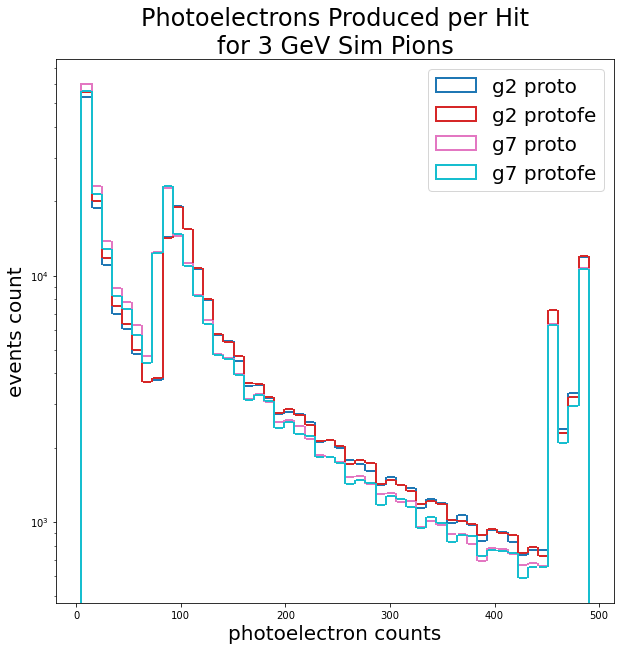

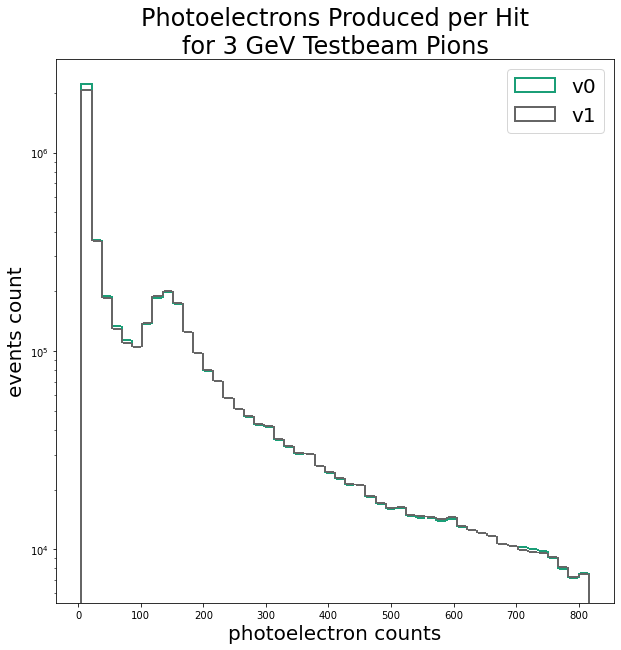

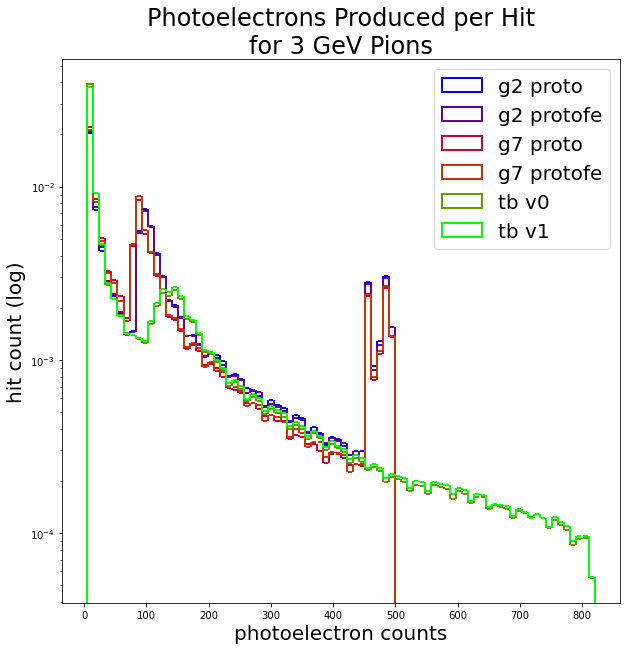

In [4]:
# photoelectrons produced per hit, original PE cut
b = calc_bins_multi([rechitPE_p32proto, rechitPE_p32protofe, rechitPE_p37proto, rechitPE_p37protofe], nbins=50)

hists([rechitPE_p32proto, rechitPE_p32protofe, rechitPE_p37proto, rechitPE_p37protofe], 
      'Photoelectrons Produced per Hit\nfor 3 GeV Sim Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe'], nbins=b, xlabel='photoelectron counts',
      ylabel='events count', yscale='log')

b = calc_bins_multi([rechitPE_p3tb0, rechitPE_p3tb1], nbins=50)

hists([rechitPE_p3tb0, rechitPE_p3tb1], 
      'Photoelectrons Produced per Hit\nfor 3 GeV Testbeam Pions', 
      ['v0', 'v1'], nbins=b, xlabel='photoelectron counts',
      ylabel='events count', colors='Dark2', yscale='log')

b = calc_bins_multi([rechitPE_p32proto, rechitPE_p32protofe, rechitPE_p37proto, rechitPE_p37protofe, rechitPE_p3tb0, rechitPE_p3tb1], nbins=50)

# include in presentation
hists([rechitPE_p32proto, rechitPE_p32protofe, rechitPE_p37proto, rechitPE_p37protofe, rechitPE_p3tb0, rechitPE_p3tb1], 
      'Photoelectrons Produced per Hit\nfor 3 GeV Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'], nbins=b, 
      xlabel='photoelectron counts', ylabel='hit count (log)', colors='brg', density=True, yscale='log')

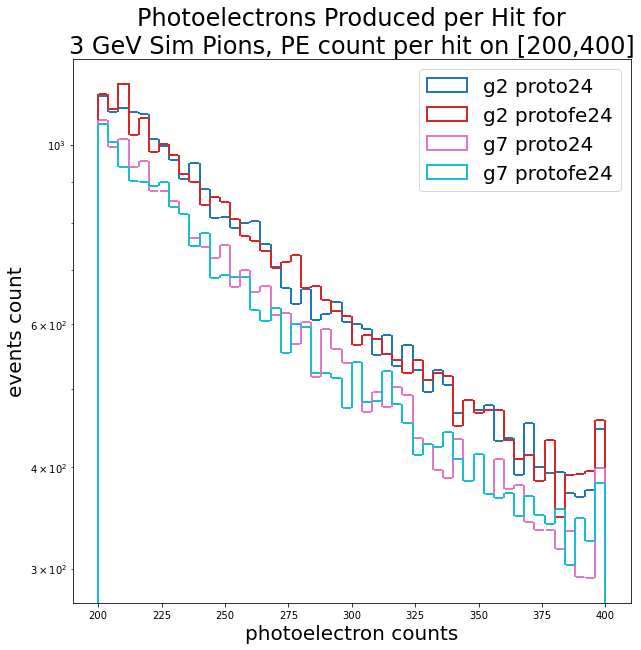

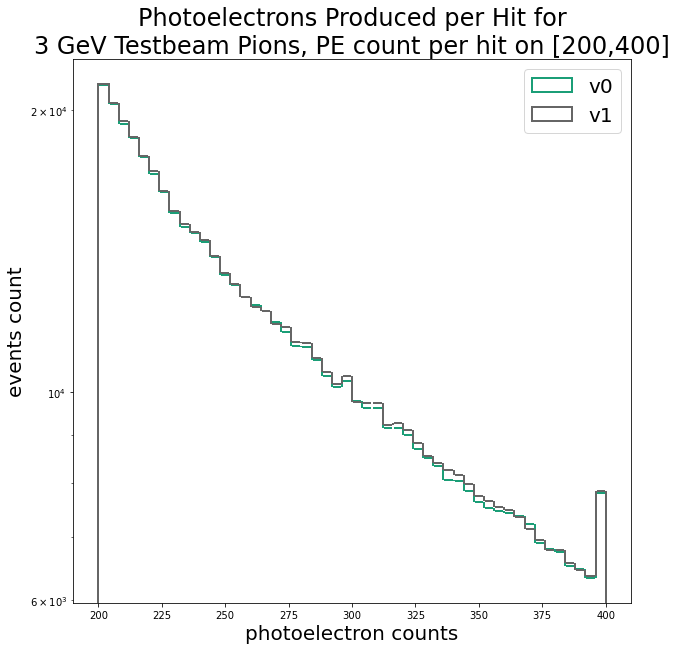

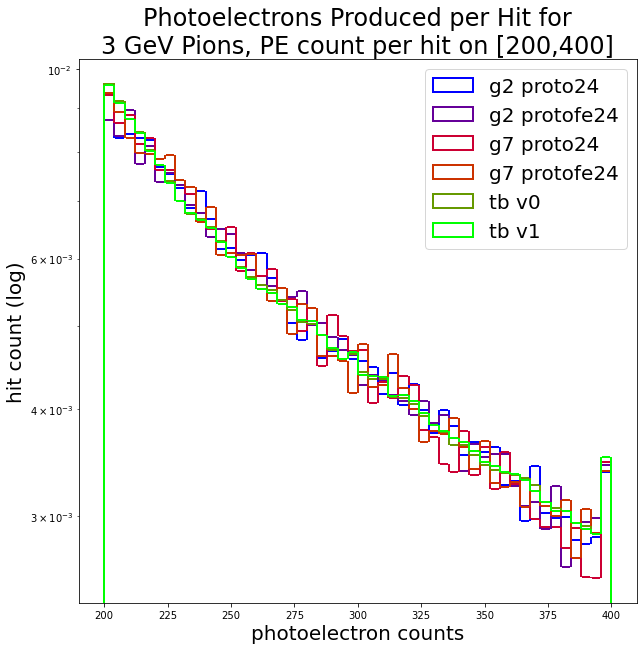

In [5]:
# photoelectrons produced per hit, [200,400] PE cut
b = calc_bins_multi([rechitPE_p32proto24, rechitPE_p32protofe24, rechitPE_p37proto24, rechitPE_p37protofe24], nbins=50)

hists([rechitPE_p32proto24, rechitPE_p32protofe24, rechitPE_p37proto24, rechitPE_p37protofe24], 
      'Photoelectrons Produced per Hit for\n3 GeV Sim Pions, PE count per hit on [200,400]', 
      ['g2 proto24', 'g2 protofe24', 'g7 proto24', 'g7 protofe24'], nbins=b, xlabel='photoelectron counts',
      ylabel='events count', yscale='log')

b = calc_bins_multi([rechitPE_p3tb024, rechitPE_p3tb124], nbins=50)

hists([rechitPE_p3tb024, rechitPE_p3tb124], 
      'Photoelectrons Produced per Hit for\n3 GeV Testbeam Pions, PE count per hit on [200,400]', 
      ['v0', 'v1'], nbins=b, xlabel='photoelectron counts',
      ylabel='events count', colors='Dark2', yscale='log')

b = calc_bins_multi([rechitPE_p32proto24, rechitPE_p32protofe24, rechitPE_p37proto24, rechitPE_p37protofe24, rechitPE_p3tb024, rechitPE_p3tb124], nbins=50)

# include in presentation
hists([rechitPE_p32proto24, rechitPE_p32protofe24, rechitPE_p37proto24, rechitPE_p37protofe24, rechitPE_p3tb024, rechitPE_p3tb124], 
      'Photoelectrons Produced per Hit for\n3 GeV Pions, PE count per hit on [200,400]', 
      ['g2 proto24', 'g2 protofe24', 'g7 proto24', 'g7 protofe24', 'tb v0', 'tb v1'], nbins=b, 
      xlabel='photoelectron counts', ylabel='hit count (log)', colors='brg', density=True, yscale='log',
      alpha=[1,1,1,1,1,1])

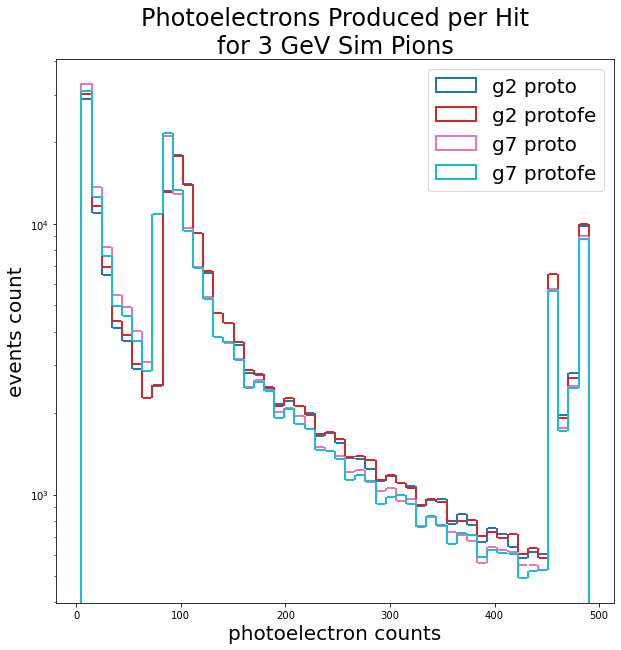

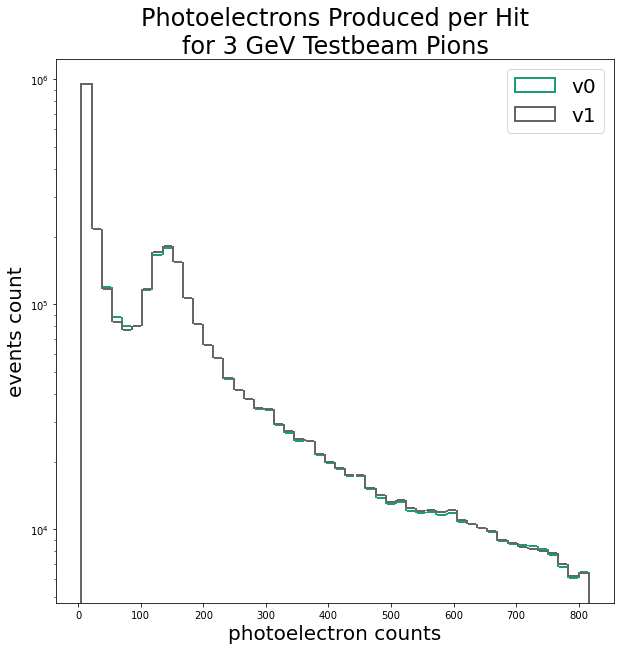

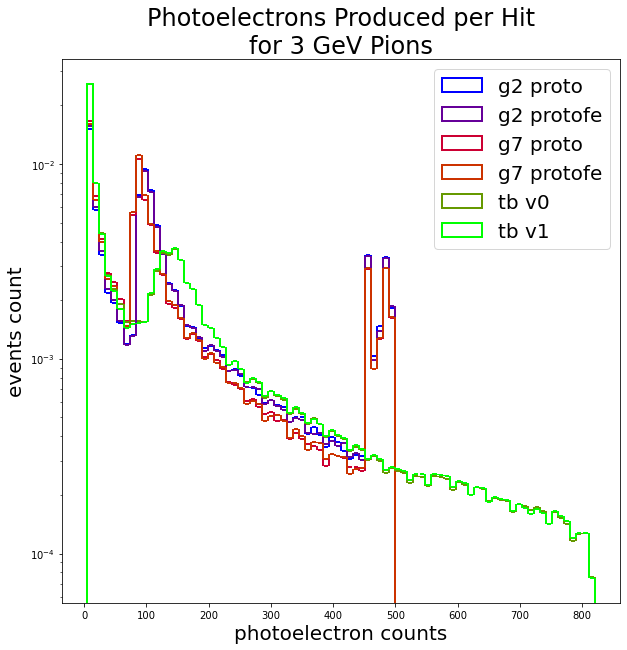

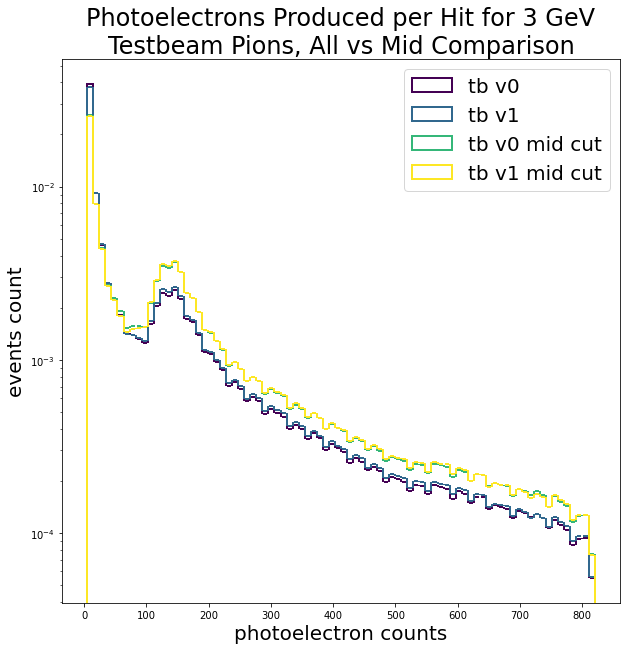

In [6]:
# photoelectrons produced per hit for middle 4 layers of detector

# form middle arrays
rechitPE_p32protoodd = np.where(np.abs(xcoords_p32proto)<100, np.where(layernum_p32proto%2==1, rechitPE_p32proto, -1), -1)
rechitPE_p32protoeven = np.where(np.abs(ycoords_p32proto)<100, np.where(layernum_p32proto%2==0, rechitPE_p32proto, -1), -1)
rechitPEmid_p32proto = np.append(rechitPE_p32protoodd, rechitPE_p32protoeven)
rechitPEmid_p32proto = rechitPEmid_p32proto[rechitPEmid_p32proto!=-1]

rechitPE_p32protofeodd = np.where(np.abs(xcoords_p32protofe)<100, np.where(layernum_p32protofe%2==1, rechitPE_p32protofe, -1), -1)
rechitPE_p32protofeeven = np.where(np.abs(ycoords_p32protofe)<100, np.where(layernum_p32protofe%2==0, rechitPE_p32protofe, -1), -1)
rechitPEmid_p32protofe = np.append(rechitPE_p32protofeodd, rechitPE_p32protofeeven)
rechitPEmid_p32protofe = rechitPEmid_p32protofe[rechitPEmid_p32protofe!=-1]

rechitPE_p37protoodd = np.where(np.abs(xcoords_p37proto)<100, np.where(layernum_p37proto%2==1, rechitPE_p37proto, -1), -1)
rechitPE_p37protoeven = np.where(np.abs(ycoords_p37proto)<100, np.where(layernum_p37proto%2==0, rechitPE_p37proto, -1), -1)
rechitPEmid_p37proto = np.append(rechitPE_p37protoodd, rechitPE_p37protoeven)
rechitPEmid_p37proto = rechitPEmid_p37proto[rechitPEmid_p37proto!=-1]

rechitPE_p37protofeodd = np.where(np.abs(xcoords_p37protofe)<100, np.where(layernum_p37protofe%2==1, rechitPE_p37protofe, -1), -1)
rechitPE_p37protofeeven = np.where(np.abs(ycoords_p37protofe)<100, np.where(layernum_p37protofe%2==0, rechitPE_p37protofe, -1), -1)
rechitPEmid_p37protofe = np.append(rechitPE_p37protofeodd, rechitPE_p37protofeeven)
rechitPEmid_p37protofe = rechitPEmid_p37protofe[rechitPEmid_p37protofe!=-1]

rechitPE_p3tb0odd = np.where(np.abs(ycoords_p3tb0)<100, np.where(layernum_p3tb0%2==1, rechitPE_p3tb0, -1), -1)
rechitPE_p3tb0even = np.where(np.abs(xcoords_p3tb0)<100, np.where(layernum_p3tb0%2==0, rechitPE_p3tb0, -1), -1)
rechitPEmid_p3tb0 = np.append(rechitPE_p3tb0odd, rechitPE_p3tb0even)
rechitPEmid_p3tb0 = rechitPEmid_p3tb0[rechitPEmid_p3tb0!=-1]

rechitPE_p3tb1odd = np.where(np.abs(ycoords_p3tb1)<100, np.where(layernum_p3tb1%2==1, rechitPE_p3tb1, -1), -1)
rechitPE_p3tb1even = np.where(np.abs(xcoords_p3tb1)<100, np.where(layernum_p3tb1%2==0, rechitPE_p3tb1, -1), -1)
rechitPEmid_p3tb1 = np.append(rechitPE_p3tb1odd, rechitPE_p3tb1even)
rechitPEmid_p3tb1 = rechitPEmid_p3tb1[rechitPEmid_p3tb1!=-1]

# graph
b = calc_bins_multi([rechitPEmid_p32proto, rechitPEmid_p32protofe, rechitPEmid_p37proto, rechitPEmid_p37protofe], nbins=50)

hists([rechitPEmid_p32proto, rechitPEmid_p32protofe, rechitPEmid_p37proto, rechitPEmid_p37protofe], 
      'Photoelectrons Produced per Hit\nfor 3 GeV Sim Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe'], nbins=b, xlabel='photoelectron counts',
      ylabel='events count', yscale='log')

b = calc_bins_multi([rechitPEmid_p3tb0, rechitPEmid_p3tb1], nbins=50)

hists([rechitPEmid_p3tb0, rechitPEmid_p3tb1], 
      'Photoelectrons Produced per Hit\nfor 3 GeV Testbeam Pions', 
      ['v0', 'v1'], nbins=b, xlabel='photoelectron counts',
      ylabel='events count', colors='Dark2', yscale='log')

b = calc_bins_multi([rechitPEmid_p32proto, rechitPEmid_p32protofe, rechitPEmid_p37proto, rechitPEmid_p37protofe, rechitPEmid_p3tb0, rechitPEmid_p3tb1], nbins=50)

hists([rechitPEmid_p32proto, rechitPEmid_p32protofe, rechitPEmid_p37proto, rechitPEmid_p37protofe, rechitPEmid_p3tb0, rechitPEmid_p3tb1], 
      'Photoelectrons Produced per Hit\nfor 3 GeV Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'], nbins=b, 
      xlabel='photoelectron counts', ylabel='events count', colors='brg', density=True, yscale='log')

# comparing middle cuts vs no cuts
hists([rechitPE_p3tb0, rechitPE_p3tb1, rechitPEmid_p3tb0, rechitPEmid_p3tb1], 
      'Photoelectrons Produced per Hit for 3 GeV\nTestbeam Pions, All vs Mid Comparison', 
      ['tb v0', 'tb v1', 'tb v0 mid cut', 'tb v1 mid cut'], nbins=b, 
      xlabel='photoelectron counts', ylabel='events count', colors='viridis', density=True, yscale='log')

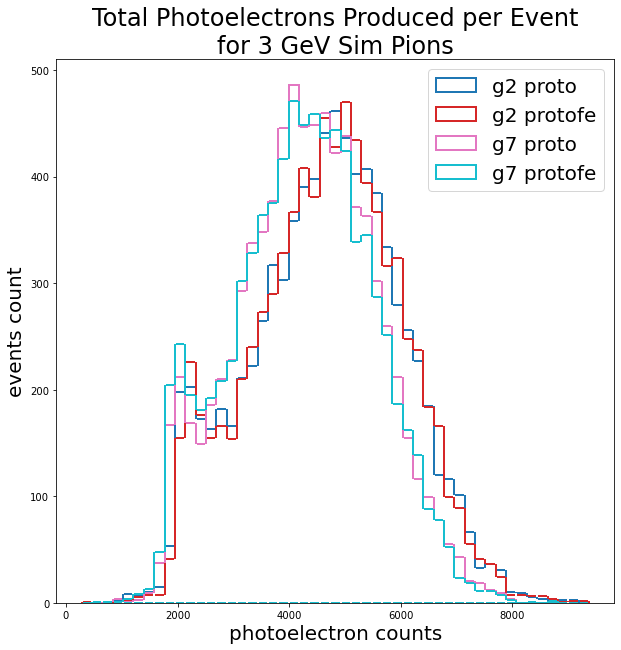

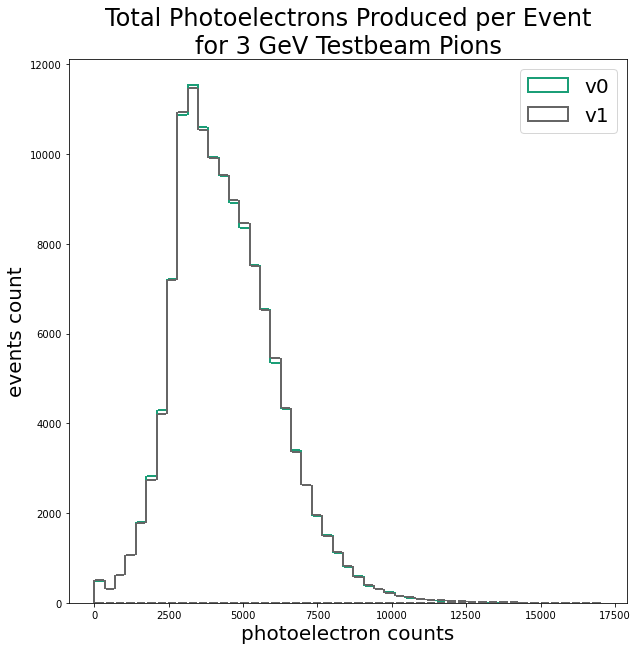

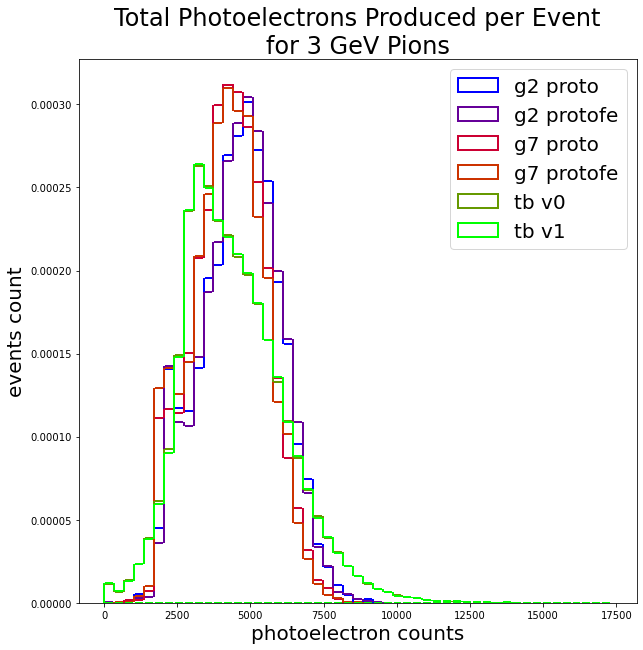

In [7]:
# total photoelectrons produced per event

hists([sumPE_p32proto, sumPE_p32protofe, sumPE_p37proto, sumPE_p37protofe], 
      'Total Photoelectrons Produced per Event\nfor 3 GeV Sim Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe'], nbins=50, xlabel='photoelectron counts',
      ylabel='events count')

hists([sumPE_p3tb0, sumPE_p3tb1], 
      'Total Photoelectrons Produced per Event\nfor 3 GeV Testbeam Pions', 
      ['v0', 'v1'], nbins=50, xlabel='photoelectron counts',
      ylabel='events count', colors='Dark2')

b = calc_bins_multi([sumPE_p32proto, sumPE_p32protofe, sumPE_p37proto, sumPE_p37protofe, sumPE_p3tb0, sumPE_p3tb1], nbins=50)

hists([sumPE_p32proto, sumPE_p32protofe, sumPE_p37proto, sumPE_p37protofe, sumPE_p3tb0, sumPE_p3tb1], 
      'Total Photoelectrons Produced per Event\nfor 3 GeV Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'], nbins=b, 
      xlabel='photoelectron counts', ylabel='events count', colors='brg', density=True)

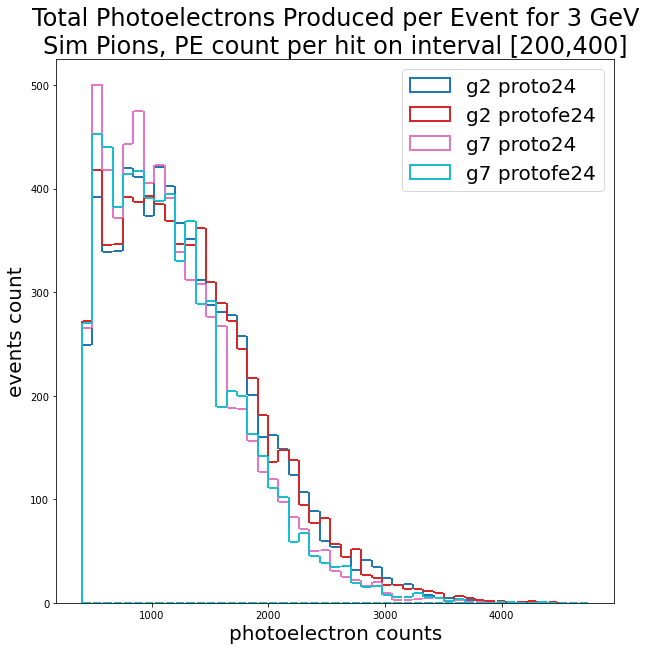

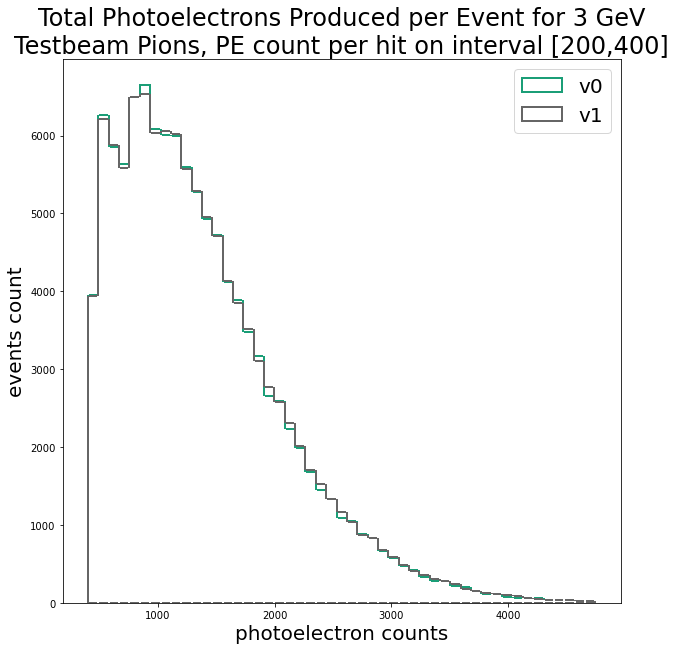

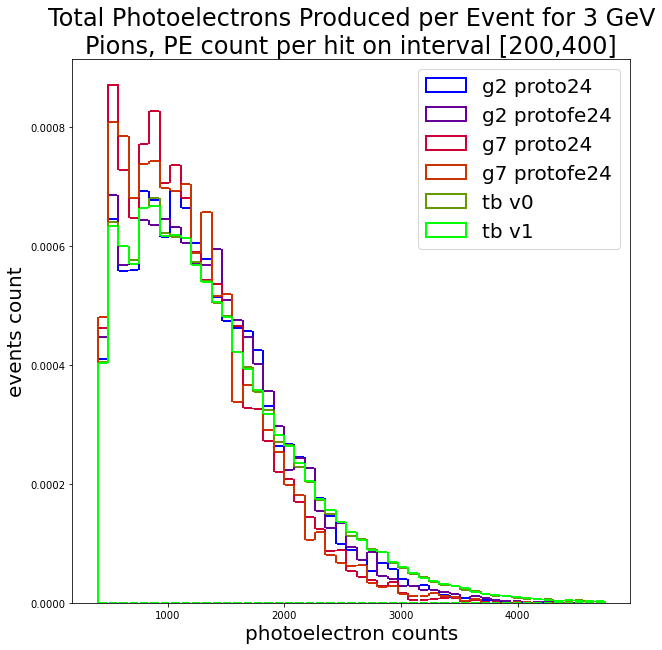

In [8]:
# total photoelectrons produced per event, PE count per hit is on the interval [200,400]
# significant energies appear to be from 400 to approaching 5000
# weird bump is from pions that MIP through the entire detector, always deposit about 1900PE, then the peak
 # is smeared from sensor calibration (at least in the testbeam data)

hists([sumPE_p32proto24, sumPE_p32protofe24, sumPE_p37proto24, sumPE_p37protofe24], 
      'Total Photoelectrons Produced per Event for 3 GeV\nSim Pions, PE count per hit on interval [200,400]', 
      ['g2 proto24', 'g2 protofe24', 'g7 proto24', 'g7 protofe24'], nbins=np.linspace(400,4750,50), 
      xlabel='photoelectron counts', ylabel='events count')

hists([sumPE_p3tb024, sumPE_p3tb124], 
      'Total Photoelectrons Produced per Event for 3 GeV\nTestbeam Pions, PE count per hit on interval [200,400]', 
      ['v0', 'v1'], nbins=np.linspace(400,4750,50), xlabel='photoelectron counts',
      ylabel='events count', colors='Dark2')

b = calc_bins_multi([sumPE_p32proto24, sumPE_p32protofe24, sumPE_p37proto24, 
                     sumPE_p37protofe24, sumPE_p3tb024, sumPE_p3tb124], nbins=50)

# this plot here is super exciting!!
# include in presentation
hists([sumPE_p32proto24, sumPE_p32protofe24, sumPE_p37proto24, sumPE_p37protofe24, sumPE_p3tb024, sumPE_p3tb124], 
      'Total Photoelectrons Produced per Event for 3 GeV\nPions, PE count per hit on interval [200,400]', 
      ['g2 proto24', 'g2 protofe24', 'g7 proto24', 'g7 protofe24', 'tb v0', 'tb v1'], 
      nbins=np.linspace(400,4750,50), alpha=[1,1,1,1,1,1],
      xlabel='photoelectron counts', ylabel='events count', colors='brg', density=True)

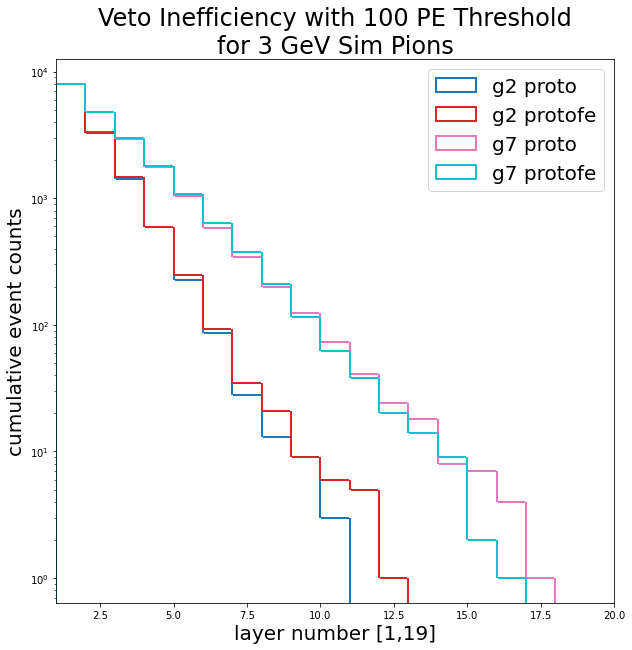

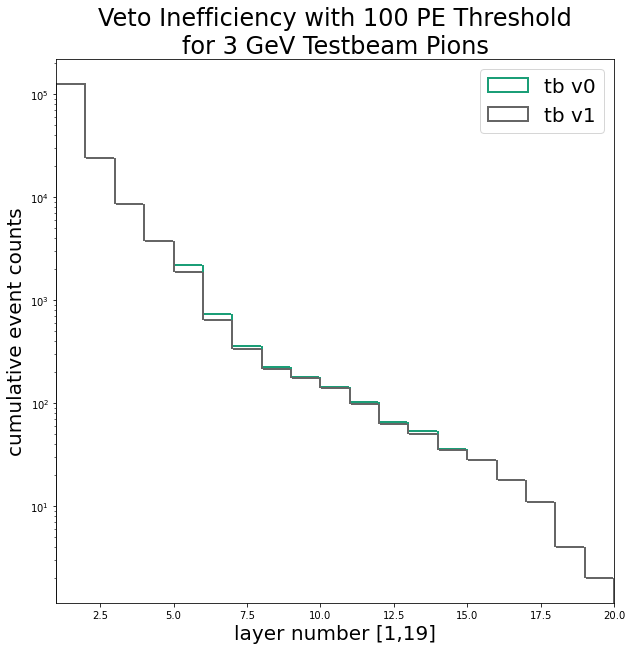

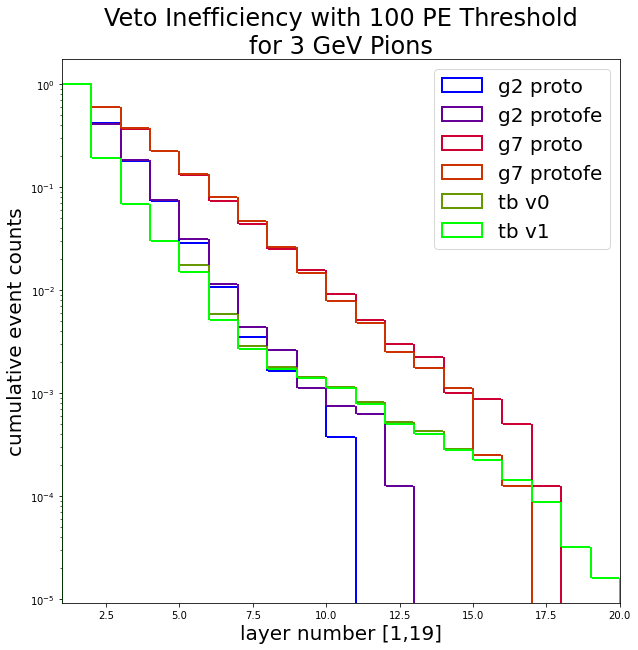

In [9]:
# veto inefficiency plots with threshold of 100 PE
hists([minLayerWithHit_p32proto, minLayerWithHit_p32protofe, minLayerWithHit_p37proto, minLayerWithHit_p37protofe], 
      'Veto Inefficiency with 100 PE Threshold\nfor 3 GeV Sim Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe'], density=False, xlim=(1,20), 
      nbins=np.linspace(1,20,20),
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

hists([minLayerWithHit_p3tb0, minLayerWithHit_p3tb1], 
      'Veto Inefficiency with 100 PE Threshold\nfor 3 GeV Testbeam Pions', 
      ['tb v0', 'tb v1'], density=False, xlim=(1,20), nbins=np.linspace(1,20,20), colors='Dark2',
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

hists([minLayerWithHit_p32proto, minLayerWithHit_p32protofe, minLayerWithHit_p37proto, minLayerWithHit_p37protofe, minLayerWithHit_p3tb0, minLayerWithHit_p3tb1], 
      'Veto Inefficiency with 100 PE Threshold\nfor 3 GeV Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'], density=True, xlim=(1,20), 
      nbins=np.linspace(1,20,20), colors='brg',
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

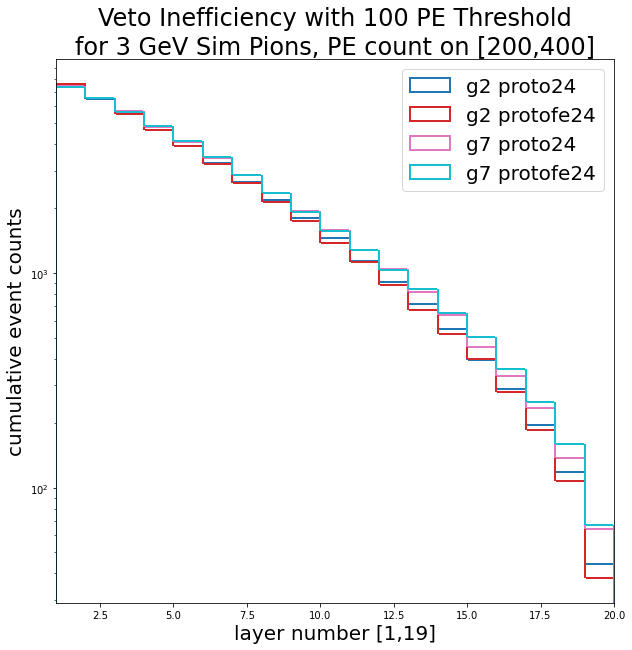

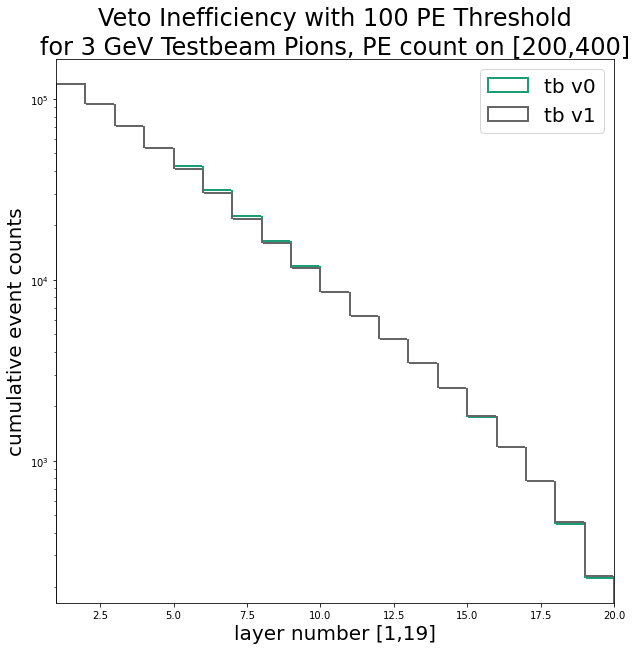

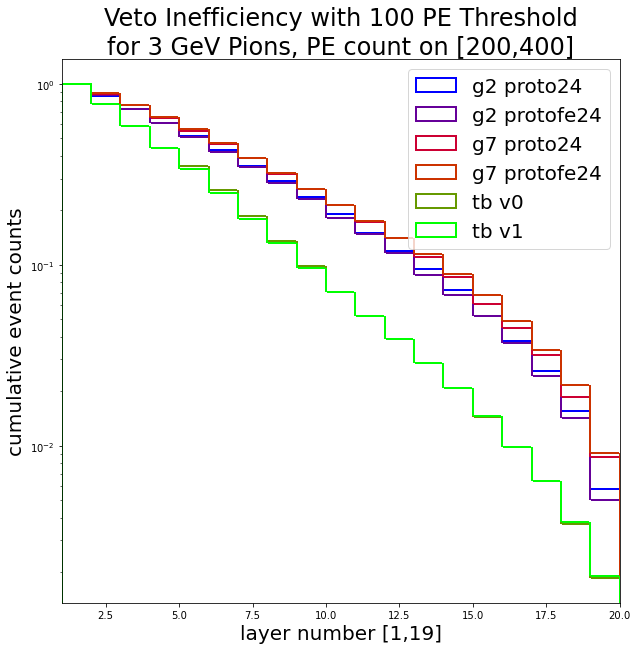

In [10]:
# veto inefficiency plots with threshold of 100 PE, PE count on [200,400]
hists([minLayerWithHit_p32proto24, minLayerWithHit_p32protofe24, minLayerWithHit_p37proto24, minLayerWithHit_p37protofe24], 
      'Veto Inefficiency with 100 PE Threshold\nfor 3 GeV Sim Pions, PE count on [200,400]', 
      ['g2 proto24', 'g2 protofe24', 'g7 proto24', 'g7 protofe24'], density=False, xlim=(1,20), 
      nbins=np.linspace(1,20,20),
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

hists([minLayerWithHit_p3tb024, minLayerWithHit_p3tb124], 
      'Veto Inefficiency with 100 PE Threshold\nfor 3 GeV Testbeam Pions, PE count on [200,400]', 
      ['tb v0', 'tb v1'], density=False, xlim=(1,20), nbins=np.linspace(1,20,20), colors='Dark2',
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

# include in presentation
hists([minLayerWithHit_p32proto24, minLayerWithHit_p32protofe24, minLayerWithHit_p37proto24, minLayerWithHit_p37protofe24, minLayerWithHit_p3tb024, minLayerWithHit_p3tb124], 
      'Veto Inefficiency with 100 PE Threshold\nfor 3 GeV Pions, PE count on [200,400]', 
      ['g2 proto24', 'g2 protofe24', 'g7 proto24', 'g7 protofe24', 'tb v0', 'tb v1'], density=True, xlim=(1,20), 
      nbins=np.linspace(1,20,20), colors='brg',
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

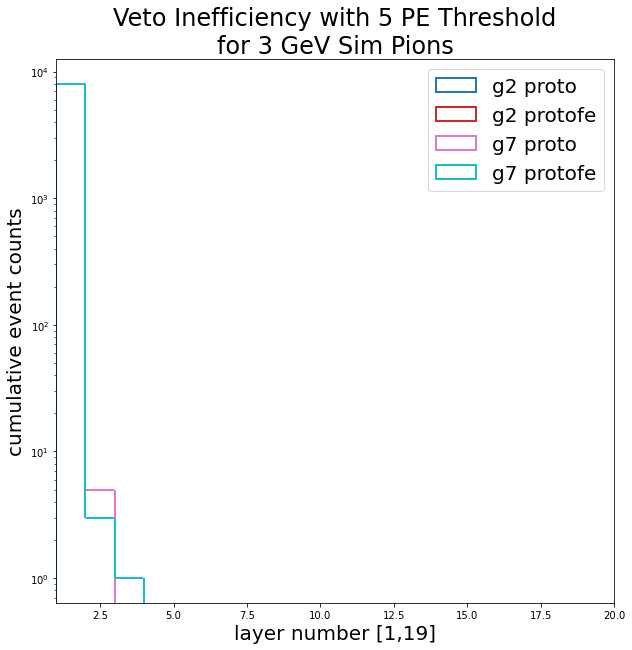

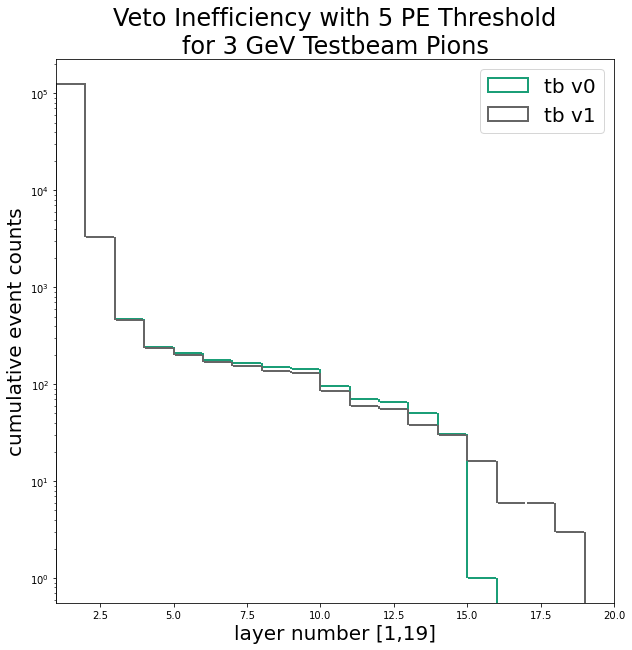

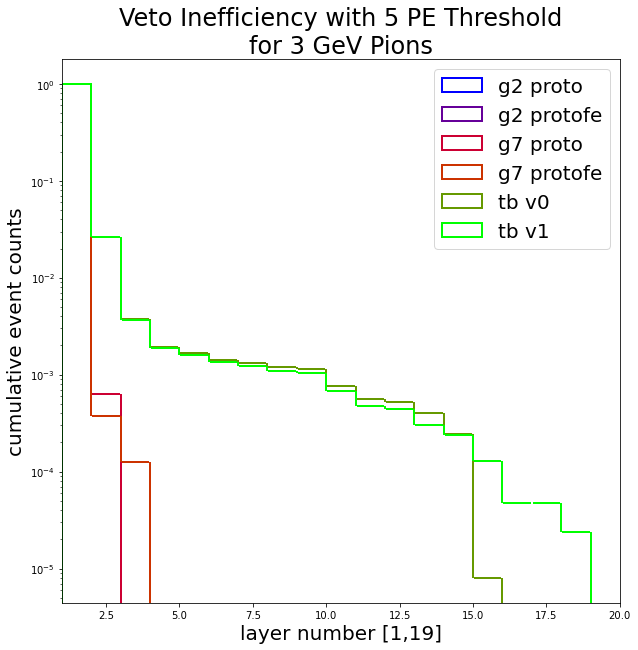

In [11]:
# veto inefficiency plots with threshold of 5 PE
hists([minLayerWithHit5_p32proto, minLayerWithHit5_p32protofe, minLayerWithHit5_p37proto, 
       minLayerWithHit5_p37protofe], 
      'Veto Inefficiency with 5 PE Threshold\nfor 3 GeV Sim Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe'], density=False, xlim=(1,20), 
      nbins=np.linspace(1,20,20),
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

hists([minLayerWithHit5_p3tb0, minLayerWithHit5_p3tb1],
      'Veto Inefficiency with 5 PE Threshold\nfor 3 GeV Testbeam Pions', 
      ['tb v0', 'tb v1'], density=False, xlim=(1,20), nbins=np.linspace(1,20,20), colors='Dark2',
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

hists([minLayerWithHit5_p32proto, minLayerWithHit5_p32protofe, minLayerWithHit5_p37proto, 
       minLayerWithHit5_p37protofe, minLayerWithHit5_p3tb0, minLayerWithHit5_p3tb1], 
      'Veto Inefficiency with 5 PE Threshold\nfor 3 GeV Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'], density=True, xlim=(1,20), 
      nbins=np.linspace(1,20,20), colors='brg',
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

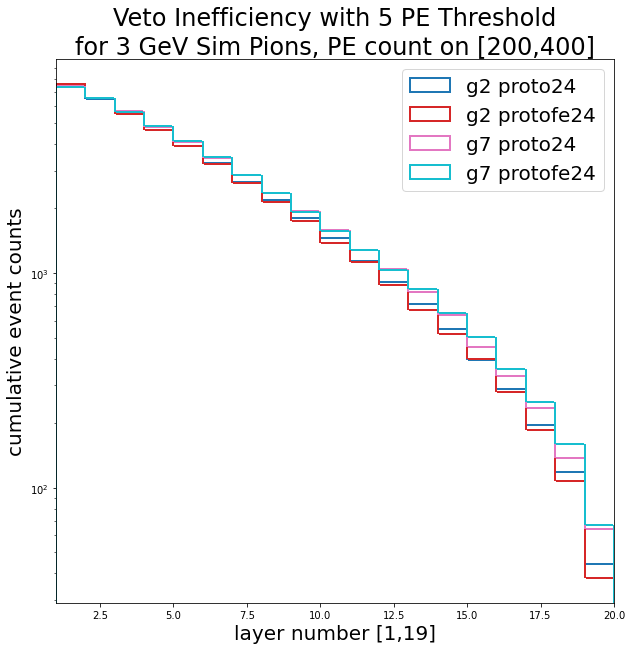

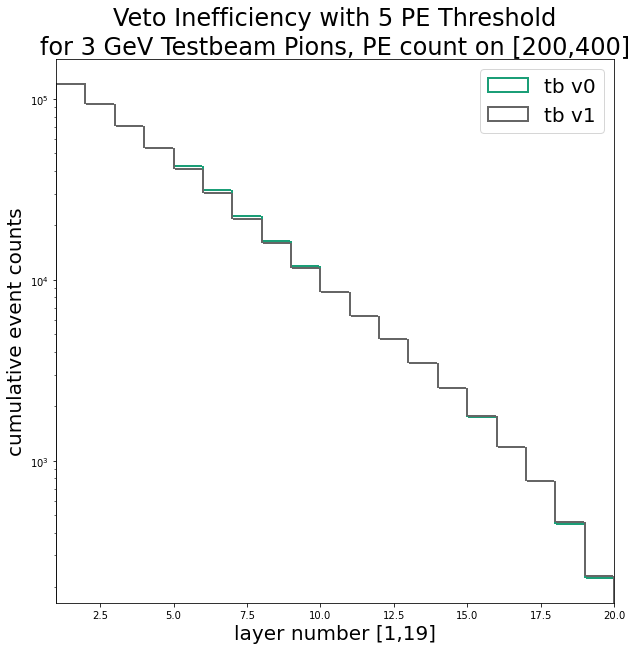

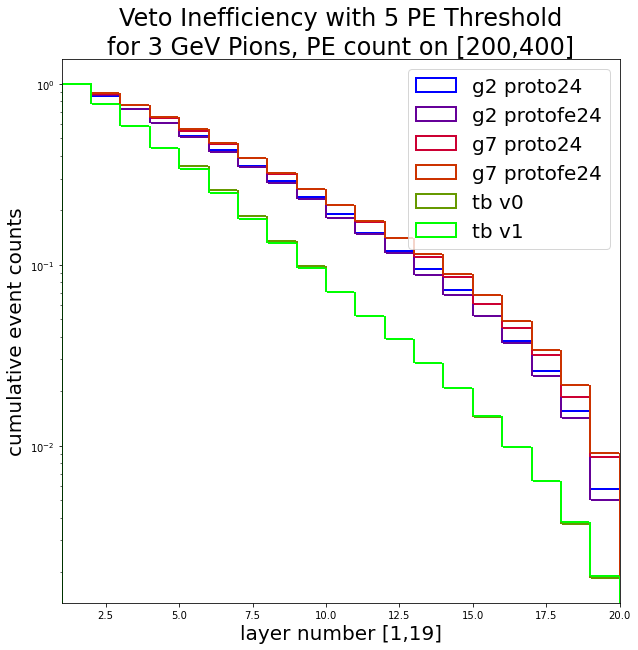

In [12]:
# veto inefficiency plots with threshold of 5 PE, PE count on [200,400]
hists([minLayerWithHit5_p32proto24, minLayerWithHit5_p32protofe24, minLayerWithHit5_p37proto24, 
       minLayerWithHit5_p37protofe24], 
      'Veto Inefficiency with 5 PE Threshold\nfor 3 GeV Sim Pions, PE count on [200,400]', 
      ['g2 proto24', 'g2 protofe24', 'g7 proto24', 'g7 protofe24'], density=False, xlim=(1,20), 
      nbins=np.linspace(1,20,20),
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

hists([minLayerWithHit5_p3tb024, minLayerWithHit5_p3tb124], 
      'Veto Inefficiency with 5 PE Threshold\nfor 3 GeV Testbeam Pions, PE count on [200,400]', 
      ['tb v0', 'tb v1'], density=False, xlim=(1,20), nbins=np.linspace(1,20,20), colors='Dark2',
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

hists([minLayerWithHit5_p32proto24, minLayerWithHit5_p32protofe24, minLayerWithHit5_p37proto24, 
       minLayerWithHit5_p37protofe24, minLayerWithHit5_p3tb024, minLayerWithHit5_p3tb124], 
      'Veto Inefficiency with 5 PE Threshold\nfor 3 GeV Pions, PE count on [200,400]', 
      ['g2 proto24', 'g2 protofe24', 'g7 proto24', 'g7 protofe24', 'tb v0', 'tb v1'], density=True, xlim=(1,20), 
      nbins=np.linspace(1,20,20), colors='brg',
      xlabel='layer number [1,19]', ylabel='cumulative event counts', cumulative=-1, yscale='log')

In [13]:
# degree of attenuation after 1 meter (attenuation length is 5m)
1/(np.e**(1/5))

0.8187307530779818

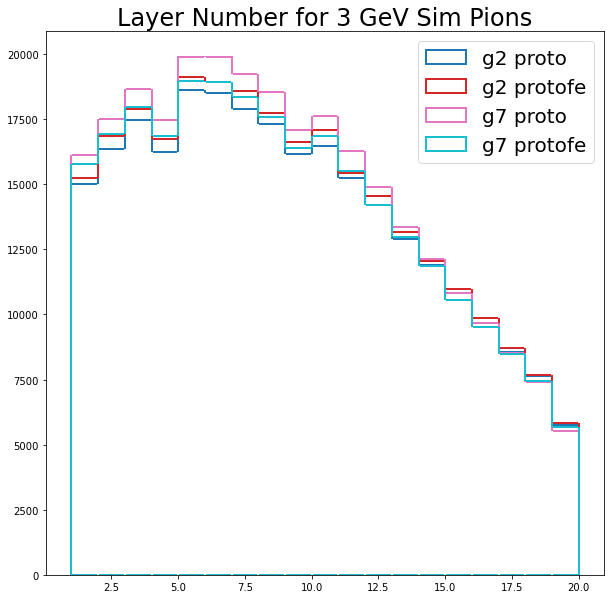

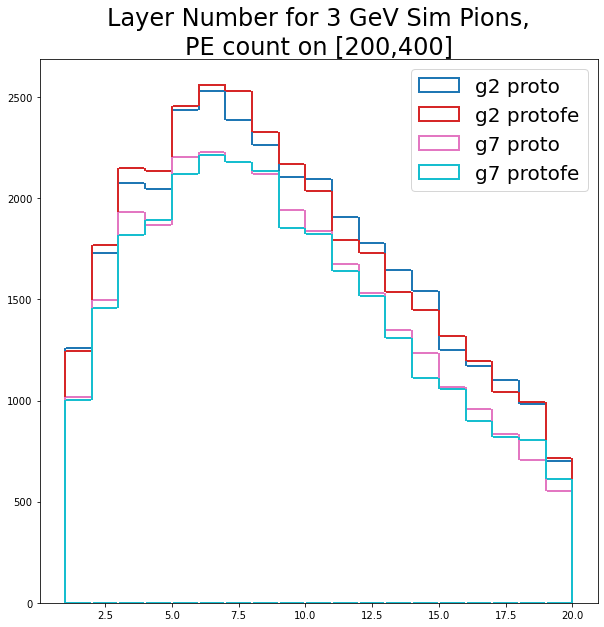

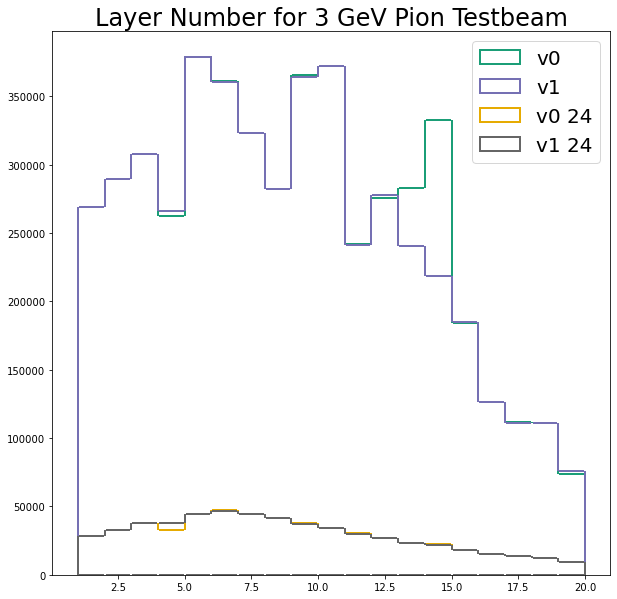

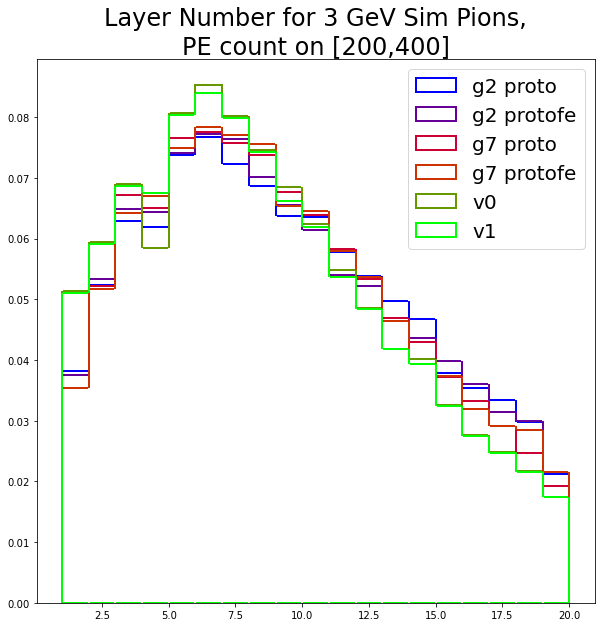

In [14]:
# depth coordinate histograms, mostly with PE count of hit on interval [200,400]
hists([layernum_p32proto, layernum_p32protofe, layernum_p37proto, layernum_p37protofe], 
      'Layer Number for 3 GeV Sim Pions', ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe'], 
      nbins=np.linspace(1,20,20))

hists([layernum_p32proto24, layernum_p32protofe24, layernum_p37proto24, layernum_p37protofe24], 
      'Layer Number for 3 GeV Sim Pions,\nPE count on [200,400]', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe'], nbins=np.linspace(1,20,20))

hists([layernum_p3tb0, layernum_p3tb1, layernum_p3tb024, layernum_p3tb124], 
      'Layer Number for 3 GeV Pion Testbeam', ['v0', 'v1', 'v0 24', 'v1 24'], nbins=np.linspace(1,20,20),
      colors='Dark2')

hists([layernum_p32proto24, layernum_p32protofe24, layernum_p37proto24, 
       layernum_p37protofe24, layernum_p3tb024, layernum_p3tb124], 
      'Layer Number for 3 GeV Sim Pions,\nPE count on [200,400]', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe', 'v0', 'v1'], 
      nbins=np.linspace(1,20,20), colors='brg', density=True)

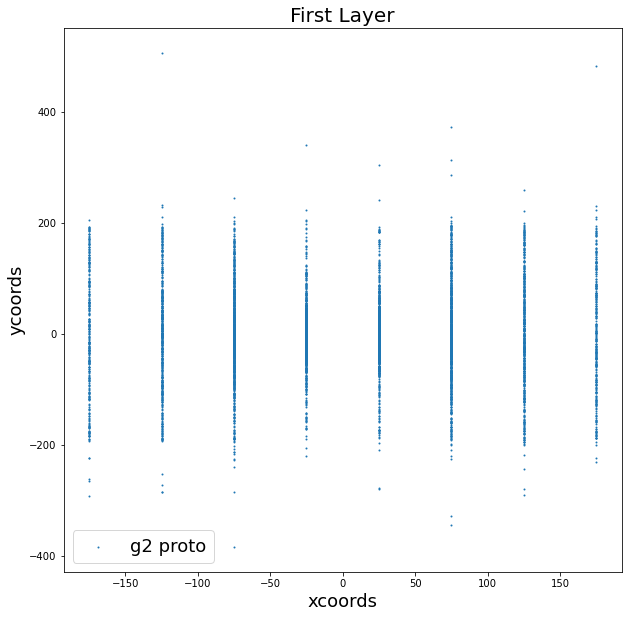

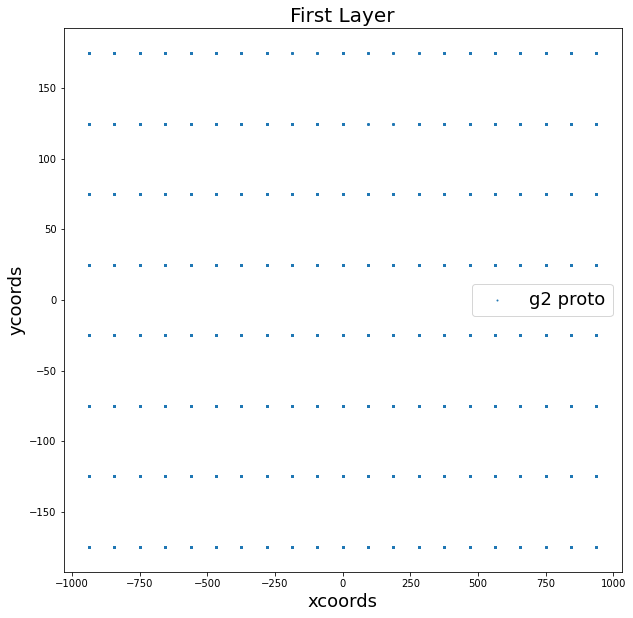

In [15]:
# aids in determining which parity of layers is horizontal/vertical
scatter1(xcoords_p32proto[layernum_p32proto==1], ycoords_p32proto[layernum_p32proto==1], 'First Layer', 'xcoords',
         'ycoords', 'g2 proto')
scatter1(xcoords_p3tb0[layernum_p3tb0==1], ycoords_p3tb0[layernum_p3tb0==1], 'First Layer', 'xcoords',
         'ycoords', 'g2 proto')
# sim: xcoords=odd, ycoords=even
# tb : xcoords=even, ycoords=odd

In [16]:
# profile plots for transverse coordinates

# make even- and odd-layered arrays
# front even layers
ycoords_p32proto_feven = np.where(layernum_p32proto%2==0, np.where(layernum_p32proto<=9, ycoords_p32proto, 1234), 1234)
ycoords_p32proto_feven = ycoords_p32proto_feven[ycoords_p32proto_feven!=1234]
ycoords_p32protofe_feven = np.where(layernum_p32protofe%2==0, np.where(layernum_p32protofe<=9, ycoords_p32protofe, 1234), 1234)
ycoords_p32protofe_feven = ycoords_p32protofe_feven[ycoords_p32protofe_feven!=1234]
ycoords_p37proto_feven = np.where(layernum_p37proto%2==0, np.where(layernum_p37proto<=9, ycoords_p37proto, 1234), 1234)
ycoords_p37proto_feven = ycoords_p37proto_feven[ycoords_p37proto_feven!=1234]
ycoords_p37protofe_feven = np.where(layernum_p37protofe%2==0, np.where(layernum_p37protofe<=9, ycoords_p37protofe, 1234), 1234)
ycoords_p37protofe_feven = ycoords_p37protofe_feven[ycoords_p37protofe_feven!=1234]
xcoords_p3tb0_feven = np.where(layernum_p3tb0%2==0, np.where(layernum_p3tb0<=9, xcoords_p3tb0, 1234), 1234)
xcoords_p3tb0_feven = xcoords_p3tb0_feven[xcoords_p3tb0_feven!=1234]
xcoords_p3tb1_feven = np.where(layernum_p3tb1%2==0, np.where(layernum_p3tb1<=9, xcoords_p3tb1, 1234), 1234)
xcoords_p3tb1_feven = xcoords_p3tb1_feven[xcoords_p3tb1_feven!=1234]

ycoords_p32proto24_feven = np.where(layernum_p32proto24%2==0, np.where(layernum_p32proto24<=9, ycoords_p32proto24, 1234), 1234)
ycoords_p32proto24_feven = ycoords_p32proto24_feven[ycoords_p32proto24_feven!=1234]
ycoords_p32protofe24_feven = np.where(layernum_p32protofe24%2==0, np.where(layernum_p32protofe24<=9, ycoords_p32protofe24, 1234), 1234)
ycoords_p32protofe24_feven = ycoords_p32protofe24_feven[ycoords_p32protofe24_feven!=1234]
ycoords_p37proto24_feven = np.where(layernum_p37proto24%2==0, np.where(layernum_p37proto24<=9, ycoords_p37proto24, 1234), 1234)
ycoords_p37proto24_feven = ycoords_p37proto24_feven[ycoords_p37proto24_feven!=1234]
ycoords_p37protofe24_feven = np.where(layernum_p37protofe24%2==0, np.where(layernum_p37protofe24<=9, ycoords_p37protofe24, 1234), 1234)
ycoords_p37protofe24_feven = ycoords_p37protofe24_feven[ycoords_p37protofe24_feven!=1234]
xcoords_p3tb024_feven = np.where(layernum_p3tb024%2==0, np.where(layernum_p3tb024<=9, xcoords_p3tb024, 1234), 1234)
xcoords_p3tb024_feven = xcoords_p3tb024_feven[xcoords_p3tb024_feven!=1234]
xcoords_p3tb124_feven = np.where(layernum_p3tb124%2==0, np.where(layernum_p3tb124<=9, xcoords_p3tb124, 1234), 1234)
xcoords_p3tb124_feven = xcoords_p3tb124_feven[xcoords_p3tb124_feven!=1234]

# front odd layers
xcoords_p32proto_fodd = np.where(layernum_p32proto%2==1, np.where(layernum_p32proto<=9, xcoords_p32proto, 1234), 1234)
xcoords_p32proto_fodd = xcoords_p32proto_fodd[xcoords_p32proto_fodd!=1234]
xcoords_p32protofe_fodd = np.where(layernum_p32protofe%2==1, np.where(layernum_p32protofe<=9, xcoords_p32protofe, 1234), 1234)
xcoords_p32protofe_fodd = xcoords_p32protofe_fodd[xcoords_p32protofe_fodd!=1234]
xcoords_p37proto_fodd = np.where(layernum_p37proto%2==1, np.where(layernum_p37proto<=9, xcoords_p37proto, 1234), 1234)
xcoords_p37proto_fodd = xcoords_p37proto_fodd[xcoords_p37proto_fodd!=1234]
xcoords_p37protofe_fodd = np.where(layernum_p37protofe%2==1, np.where(layernum_p37protofe<=9, xcoords_p37protofe, 1234), 1234)
xcoords_p37protofe_fodd = xcoords_p37protofe_fodd[xcoords_p37protofe_fodd!=1234]
ycoords_p3tb0_fodd = np.where(layernum_p3tb0%2==1, np.where(layernum_p3tb0<=9, ycoords_p3tb0, 1234), 1234)
ycoords_p3tb0_fodd = ycoords_p3tb0_fodd[ycoords_p3tb0_fodd!=1234]
ycoords_p3tb1_fodd = np.where(layernum_p3tb1%2==1, np.where(layernum_p3tb1<=9, ycoords_p3tb1, 1234), 1234)
ycoords_p3tb1_fodd = ycoords_p3tb1_fodd[ycoords_p3tb1_fodd!=1234]

xcoords_p32proto24_fodd = np.where(layernum_p32proto24%2==1, np.where(layernum_p32proto24<=9, xcoords_p32proto24, 1234), 1234)
xcoords_p32proto24_fodd = xcoords_p32proto24_fodd[xcoords_p32proto24_fodd!=1234]
xcoords_p32protofe24_fodd = np.where(layernum_p32protofe24%2==1, np.where(layernum_p32protofe24<=9, xcoords_p32protofe24, 1234), 1234)
xcoords_p32protofe24_fodd = xcoords_p32protofe24_fodd[xcoords_p32protofe24_fodd!=1234]
xcoords_p37proto24_fodd = np.where(layernum_p37proto24%2==1, np.where(layernum_p37proto24<=9, xcoords_p37proto24, 1234), 1234)
xcoords_p37proto24_fodd = xcoords_p37proto24_fodd[xcoords_p37proto24_fodd!=1234]
xcoords_p37protofe24_fodd = np.where(layernum_p37protofe24%2==1, np.where(layernum_p37protofe24<=9, xcoords_p37protofe24, 1234), 1234)
xcoords_p37protofe24_fodd = xcoords_p37protofe24_fodd[xcoords_p37protofe24_fodd!=1234]
ycoords_p3tb024_fodd = np.where(layernum_p3tb024%2==1, np.where(layernum_p3tb024<=9, ycoords_p3tb024, 1234), 1234)
ycoords_p3tb024_fodd = ycoords_p3tb024_fodd[ycoords_p3tb024_fodd!=1234]
ycoords_p3tb124_fodd = np.where(layernum_p3tb124%2==1, np.where(layernum_p3tb124<=9, ycoords_p3tb124, 1234), 1234)
ycoords_p3tb124_fodd = ycoords_p3tb124_fodd[ycoords_p3tb124_fodd!=1234]

# back even layers
ycoords_p32proto_beven = np.where(layernum_p32proto%2==0, np.where(layernum_p32proto>=10, ycoords_p32proto, 1234), 1234)
ycoords_p32proto_beven = ycoords_p32proto_beven[ycoords_p32proto_beven!=1234]
ycoords_p32protofe_beven = np.where(layernum_p32protofe%2==0, np.where(layernum_p32protofe>=10, ycoords_p32protofe, 1234), 1234)
ycoords_p32protofe_beven = ycoords_p32protofe_beven[ycoords_p32protofe_beven!=1234]
ycoords_p37proto_beven = np.where(layernum_p37proto%2==0, np.where(layernum_p37proto>=10, ycoords_p37proto, 1234), 1234)
ycoords_p37proto_beven = ycoords_p37proto_beven[ycoords_p37proto_beven!=1234]
ycoords_p37protofe_beven = np.where(layernum_p37protofe%2==0, np.where(layernum_p37protofe>=10, ycoords_p37protofe, 1234), 1234)
ycoords_p37protofe_beven = ycoords_p37protofe_beven[ycoords_p37protofe_beven!=1234]
xcoords_p3tb0_beven = np.where(layernum_p3tb0%2==0, np.where(layernum_p3tb0>=10, xcoords_p3tb0, 1234), 1234)
xcoords_p3tb0_beven = xcoords_p3tb0_beven[xcoords_p3tb0_beven!=1234]
xcoords_p3tb1_beven = np.where(layernum_p3tb1%2==0, np.where(layernum_p3tb1>=10, xcoords_p3tb1, 1234), 1234)
xcoords_p3tb1_beven = xcoords_p3tb1_beven[xcoords_p3tb1_beven!=1234]

ycoords_p32proto24_beven = np.where(layernum_p32proto24%2==0, np.where(layernum_p32proto24>=10, ycoords_p32proto24, 1234), 1234)
ycoords_p32proto24_beven = ycoords_p32proto24_beven[ycoords_p32proto24_beven!=1234]
ycoords_p32protofe24_beven = np.where(layernum_p32protofe24%2==0, np.where(layernum_p32protofe24>=10, ycoords_p32protofe24, 1234), 1234)
ycoords_p32protofe24_beven = ycoords_p32protofe24_beven[ycoords_p32protofe24_beven!=1234]
ycoords_p37proto24_beven = np.where(layernum_p37proto24%2==0, np.where(layernum_p37proto24>=10, ycoords_p37proto24, 1234), 1234)
ycoords_p37proto24_beven = ycoords_p37proto24_beven[ycoords_p37proto24_beven!=1234]
ycoords_p37protofe24_beven = np.where(layernum_p37protofe24%2==0, np.where(layernum_p37protofe24>=10, ycoords_p37protofe24, 1234), 1234)
ycoords_p37protofe24_beven = ycoords_p37protofe24_beven[ycoords_p37protofe24_beven!=1234]
xcoords_p3tb024_beven = np.where(layernum_p3tb024%2==0, np.where(layernum_p3tb024>=10, xcoords_p3tb024, 1234), 1234)
xcoords_p3tb024_beven = xcoords_p3tb024_beven[xcoords_p3tb024_beven!=1234]
xcoords_p3tb124_beven = np.where(layernum_p3tb124%2==0, np.where(layernum_p3tb124>=10, xcoords_p3tb124, 1234), 1234)
xcoords_p3tb124_beven = xcoords_p3tb124_beven[xcoords_p3tb124_beven!=1234]

# back odd layers
xcoords_p32proto_bodd = np.where(layernum_p32proto%2==1, np.where(layernum_p32proto>=10, xcoords_p32proto, 1234), 1234)
xcoords_p32proto_bodd = xcoords_p32proto_bodd[xcoords_p32proto_bodd!=1234]
xcoords_p32protofe_bodd = np.where(layernum_p32protofe%2==1, np.where(layernum_p32protofe>=10, xcoords_p32protofe, 1234), 1234)
xcoords_p32protofe_bodd = xcoords_p32protofe_bodd[xcoords_p32protofe_bodd!=1234]
xcoords_p37proto_bodd = np.where(layernum_p37proto%2==1, np.where(layernum_p37proto>=10, xcoords_p37proto, 1234), 1234)
xcoords_p37proto_bodd = xcoords_p37proto_bodd[xcoords_p37proto_bodd!=1234]
xcoords_p37protofe_bodd = np.where(layernum_p37protofe%2==1, np.where(layernum_p37protofe>=10, xcoords_p37protofe, 1234), 1234)
xcoords_p37protofe_bodd = xcoords_p37protofe_bodd[xcoords_p37protofe_bodd!=1234]
ycoords_p3tb0_bodd = np.where(layernum_p3tb0%2==1, np.where(layernum_p3tb0>=10, ycoords_p3tb0, 1234), 1234)
ycoords_p3tb0_bodd = ycoords_p3tb0_bodd[ycoords_p3tb0_bodd!=1234]
ycoords_p3tb1_bodd = np.where(layernum_p3tb1%2==1, np.where(layernum_p3tb1>=10, ycoords_p3tb1, 1234), 1234)
ycoords_p3tb1_bodd = ycoords_p3tb1_bodd[ycoords_p3tb1_bodd!=1234]

xcoords_p32proto24_bodd = np.where(layernum_p32proto24%2==1, np.where(layernum_p32proto24>=10, xcoords_p32proto24, 1234), 1234)
xcoords_p32proto24_bodd = xcoords_p32proto24_bodd[xcoords_p32proto24_bodd!=1234]
xcoords_p32protofe24_bodd = np.where(layernum_p32protofe24%2==1, np.where(layernum_p32protofe24>=10, xcoords_p32protofe24, 1234), 1234)
xcoords_p32protofe24_bodd = xcoords_p32protofe24_bodd[xcoords_p32protofe24_bodd!=1234]
xcoords_p37proto24_bodd = np.where(layernum_p37proto24%2==1, np.where(layernum_p37proto24>=10, xcoords_p37proto24, 1234), 1234)
xcoords_p37proto24_bodd = xcoords_p37proto24_bodd[xcoords_p37proto24_bodd!=1234]
xcoords_p37protofe24_bodd = np.where(layernum_p37protofe24%2==1, np.where(layernum_p37protofe24>=10, xcoords_p37protofe24, 1234), 1234)
xcoords_p37protofe24_bodd = xcoords_p37protofe24_bodd[xcoords_p37protofe24_bodd!=1234]
ycoords_p3tb024_bodd = np.where(layernum_p3tb024%2==1, np.where(layernum_p3tb024>=10, ycoords_p3tb024, 1234), 1234)
ycoords_p3tb024_bodd = ycoords_p3tb024_bodd[ycoords_p3tb024_bodd!=1234]
ycoords_p3tb124_bodd = np.where(layernum_p3tb124%2==1, np.where(layernum_p3tb124>=10, ycoords_p3tb124, 1234), 1234)
ycoords_p3tb124_bodd = ycoords_p3tb124_bodd[ycoords_p3tb124_bodd!=1234]

In [17]:
# rechitPE arrays
rechitPE_p32proto_feven = np.where(layernum_p32proto%2==0, np.where(layernum_p32proto<=9, rechitPE_p32proto, 1234), 1234)
rechitPE_p32proto_feven = rechitPE_p32proto_feven[rechitPE_p32proto_feven!=1234]
rechitPE_p32protofe_feven = np.where(layernum_p32protofe%2==0, np.where(layernum_p32protofe<=9, rechitPE_p32protofe, 1234), 1234)
rechitPE_p32protofe_feven = rechitPE_p32protofe_feven[rechitPE_p32protofe_feven!=1234]
rechitPE_p37proto_feven = np.where(layernum_p37proto%2==0, np.where(layernum_p37proto<=9, rechitPE_p37proto, 1234), 1234)
rechitPE_p37proto_feven = rechitPE_p37proto_feven[rechitPE_p37proto_feven!=1234]
rechitPE_p37protofe_feven = np.where(layernum_p37protofe%2==0, np.where(layernum_p37protofe<=9, rechitPE_p37protofe, 1234), 1234)
rechitPE_p37protofe_feven = rechitPE_p37protofe_feven[rechitPE_p37protofe_feven!=1234]
rechitPE_p3tb0_feven = np.where(layernum_p3tb0%2==0, np.where(layernum_p3tb0<=9, rechitPE_p3tb0, 1234), 1234)
rechitPE_p3tb0_feven = rechitPE_p3tb0_feven[rechitPE_p3tb0_feven!=1234]
rechitPE_p3tb1_feven = np.where(layernum_p3tb1%2==0, np.where(layernum_p3tb1<=9, rechitPE_p3tb1, 1234), 1234)
rechitPE_p3tb1_feven = rechitPE_p3tb1_feven[rechitPE_p3tb1_feven!=1234]

rechitPE_p32proto24_feven = np.where(layernum_p32proto24%2==0, np.where(layernum_p32proto24<=9, rechitPE_p32proto24, 1234), 1234)
rechitPE_p32proto24_feven = rechitPE_p32proto24_feven[rechitPE_p32proto24_feven!=1234]
rechitPE_p32protofe24_feven = np.where(layernum_p32protofe24%2==0, np.where(layernum_p32protofe24<=9, rechitPE_p32protofe24, 1234), 1234)
rechitPE_p32protofe24_feven = rechitPE_p32protofe24_feven[rechitPE_p32protofe24_feven!=1234]
rechitPE_p37proto24_feven = np.where(layernum_p37proto24%2==0, np.where(layernum_p37proto24<=9, rechitPE_p37proto24, 1234), 1234)
rechitPE_p37proto24_feven = rechitPE_p37proto24_feven[rechitPE_p37proto24_feven!=1234]
rechitPE_p37protofe24_feven = np.where(layernum_p37protofe24%2==0, np.where(layernum_p37protofe24<=9, rechitPE_p37protofe24, 1234), 1234)
rechitPE_p37protofe24_feven = rechitPE_p37protofe24_feven[rechitPE_p37protofe24_feven!=1234]
rechitPE_p3tb024_feven = np.where(layernum_p3tb024%2==0, np.where(layernum_p3tb024<=9, rechitPE_p3tb024, 1234), 1234)
rechitPE_p3tb024_feven = rechitPE_p3tb024_feven[rechitPE_p3tb024_feven!=1234]
rechitPE_p3tb124_feven = np.where(layernum_p3tb124%2==0, np.where(layernum_p3tb124<=9, rechitPE_p3tb124, 1234), 1234)
rechitPE_p3tb124_feven = rechitPE_p3tb124_feven[rechitPE_p3tb124_feven!=1234]

# front odd layers
rechitPE_p32proto_fodd = np.where(layernum_p32proto%2==1, np.where(layernum_p32proto<=9, rechitPE_p32proto, 1234), 1234)
rechitPE_p32proto_fodd = rechitPE_p32proto_fodd[rechitPE_p32proto_fodd!=1234]
rechitPE_p32protofe_fodd = np.where(layernum_p32protofe%2==1, np.where(layernum_p32protofe<=9, rechitPE_p32protofe, 1234), 1234)
rechitPE_p32protofe_fodd = rechitPE_p32protofe_fodd[rechitPE_p32protofe_fodd!=1234]
rechitPE_p37proto_fodd = np.where(layernum_p37proto%2==1, np.where(layernum_p37proto<=9, rechitPE_p37proto, 1234), 1234)
rechitPE_p37proto_fodd = rechitPE_p37proto_fodd[rechitPE_p37proto_fodd!=1234]
rechitPE_p37protofe_fodd = np.where(layernum_p37protofe%2==1, np.where(layernum_p37protofe<=9, rechitPE_p37protofe, 1234), 1234)
rechitPE_p37protofe_fodd = rechitPE_p37protofe_fodd[rechitPE_p37protofe_fodd!=1234]
rechitPE_p3tb0_fodd = np.where(layernum_p3tb0%2==1, np.where(layernum_p3tb0<=9, rechitPE_p3tb0, 1234), 1234)
rechitPE_p3tb0_fodd = rechitPE_p3tb0_fodd[rechitPE_p3tb0_fodd!=1234]
rechitPE_p3tb1_fodd = np.where(layernum_p3tb1%2==1, np.where(layernum_p3tb1<=9, rechitPE_p3tb1, 1234), 1234)
rechitPE_p3tb1_fodd = rechitPE_p3tb1_fodd[rechitPE_p3tb1_fodd!=1234]

rechitPE_p32proto24_fodd = np.where(layernum_p32proto24%2==1, np.where(layernum_p32proto24<=9, rechitPE_p32proto24, 1234), 1234)
rechitPE_p32proto24_fodd = rechitPE_p32proto24_fodd[rechitPE_p32proto24_fodd!=1234]
rechitPE_p32protofe24_fodd = np.where(layernum_p32protofe24%2==1, np.where(layernum_p32protofe24<=9, rechitPE_p32protofe24, 1234), 1234)
rechitPE_p32protofe24_fodd = rechitPE_p32protofe24_fodd[rechitPE_p32protofe24_fodd!=1234]
rechitPE_p37proto24_fodd = np.where(layernum_p37proto24%2==1, np.where(layernum_p37proto24<=9, rechitPE_p37proto24, 1234), 1234)
rechitPE_p37proto24_fodd = rechitPE_p37proto24_fodd[rechitPE_p37proto24_fodd!=1234]
rechitPE_p37protofe24_fodd = np.where(layernum_p37protofe24%2==1, np.where(layernum_p37protofe24<=9, rechitPE_p37protofe24, 1234), 1234)
rechitPE_p37protofe24_fodd = rechitPE_p37protofe24_fodd[rechitPE_p37protofe24_fodd!=1234]
rechitPE_p3tb024_fodd = np.where(layernum_p3tb024%2==1, np.where(layernum_p3tb024<=9, rechitPE_p3tb024, 1234), 1234)
rechitPE_p3tb024_fodd = rechitPE_p3tb024_fodd[rechitPE_p3tb024_fodd!=1234]
rechitPE_p3tb124_fodd = np.where(layernum_p3tb124%2==1, np.where(layernum_p3tb124<=9, rechitPE_p3tb124, 1234), 1234)
rechitPE_p3tb124_fodd = rechitPE_p3tb124_fodd[rechitPE_p3tb124_fodd!=1234]

# back even layers
rechitPE_p32proto_beven = np.where(layernum_p32proto%2==0, np.where(layernum_p32proto>=10, rechitPE_p32proto, 1234), 1234)
rechitPE_p32proto_beven = rechitPE_p32proto_beven[rechitPE_p32proto_beven!=1234]
rechitPE_p32protofe_beven = np.where(layernum_p32protofe%2==0, np.where(layernum_p32protofe>=10, rechitPE_p32protofe, 1234), 1234)
rechitPE_p32protofe_beven = rechitPE_p32protofe_beven[rechitPE_p32protofe_beven!=1234]
rechitPE_p37proto_beven = np.where(layernum_p37proto%2==0, np.where(layernum_p37proto>=10, rechitPE_p37proto, 1234), 1234)
rechitPE_p37proto_beven = rechitPE_p37proto_beven[rechitPE_p37proto_beven!=1234]
rechitPE_p37protofe_beven = np.where(layernum_p37protofe%2==0, np.where(layernum_p37protofe>=10, rechitPE_p37protofe, 1234), 1234)
rechitPE_p37protofe_beven = rechitPE_p37protofe_beven[rechitPE_p37protofe_beven!=1234]
rechitPE_p3tb0_beven = np.where(layernum_p3tb0%2==0, np.where(layernum_p3tb0>=10, rechitPE_p3tb0, 1234), 1234)
rechitPE_p3tb0_beven = rechitPE_p3tb0_beven[rechitPE_p3tb0_beven!=1234]
rechitPE_p3tb1_beven = np.where(layernum_p3tb1%2==0, np.where(layernum_p3tb1>=10, rechitPE_p3tb1, 1234), 1234)
rechitPE_p3tb1_beven = rechitPE_p3tb1_beven[rechitPE_p3tb1_beven!=1234]

rechitPE_p32proto24_beven = np.where(layernum_p32proto24%2==0, np.where(layernum_p32proto24>=10, rechitPE_p32proto24, 1234), 1234)
rechitPE_p32proto24_beven = rechitPE_p32proto24_beven[rechitPE_p32proto24_beven!=1234]
rechitPE_p32protofe24_beven = np.where(layernum_p32protofe24%2==0, np.where(layernum_p32protofe24>=10, rechitPE_p32protofe24, 1234), 1234)
rechitPE_p32protofe24_beven = rechitPE_p32protofe24_beven[rechitPE_p32protofe24_beven!=1234]
rechitPE_p37proto24_beven = np.where(layernum_p37proto24%2==0, np.where(layernum_p37proto24>=10, rechitPE_p37proto24, 1234), 1234)
rechitPE_p37proto24_beven = rechitPE_p37proto24_beven[rechitPE_p37proto24_beven!=1234]
rechitPE_p37protofe24_beven = np.where(layernum_p37protofe24%2==0, np.where(layernum_p37protofe24>=10, rechitPE_p37protofe24, 1234), 1234)
rechitPE_p37protofe24_beven = rechitPE_p37protofe24_beven[rechitPE_p37protofe24_beven!=1234]
rechitPE_p3tb024_beven = np.where(layernum_p3tb024%2==0, np.where(layernum_p3tb024>=10, rechitPE_p3tb024, 1234), 1234)
rechitPE_p3tb024_beven = rechitPE_p3tb024_beven[rechitPE_p3tb024_beven!=1234]
rechitPE_p3tb124_beven = np.where(layernum_p3tb124%2==0, np.where(layernum_p3tb124>=10, rechitPE_p3tb124, 1234), 1234)
rechitPE_p3tb124_beven = rechitPE_p3tb124_beven[rechitPE_p3tb124_beven!=1234]

# back odd layers
rechitPE_p32proto_bodd = np.where(layernum_p32proto%2==1, np.where(layernum_p32proto>=10, rechitPE_p32proto, 1234), 1234)
rechitPE_p32proto_bodd = rechitPE_p32proto_bodd[rechitPE_p32proto_bodd!=1234]
rechitPE_p32protofe_bodd = np.where(layernum_p32protofe%2==1, np.where(layernum_p32protofe>=10, rechitPE_p32protofe, 1234), 1234)
rechitPE_p32protofe_bodd = rechitPE_p32protofe_bodd[rechitPE_p32protofe_bodd!=1234]
rechitPE_p37proto_bodd = np.where(layernum_p37proto%2==1, np.where(layernum_p37proto>=10, rechitPE_p37proto, 1234), 1234)
rechitPE_p37proto_bodd = rechitPE_p37proto_bodd[rechitPE_p37proto_bodd!=1234]
rechitPE_p37protofe_bodd = np.where(layernum_p37protofe%2==1, np.where(layernum_p37protofe>=10, rechitPE_p37protofe, 1234), 1234)
rechitPE_p37protofe_bodd = rechitPE_p37protofe_bodd[rechitPE_p37protofe_bodd!=1234]
rechitPE_p3tb0_bodd = np.where(layernum_p3tb0%2==1, np.where(layernum_p3tb0>=10, rechitPE_p3tb0, 1234), 1234)
rechitPE_p3tb0_bodd = rechitPE_p3tb0_bodd[rechitPE_p3tb0_bodd!=1234]
rechitPE_p3tb1_bodd = np.where(layernum_p3tb1%2==1, np.where(layernum_p3tb1>=10, rechitPE_p3tb1, 1234), 1234)
rechitPE_p3tb1_bodd = rechitPE_p3tb1_bodd[rechitPE_p3tb1_bodd!=1234]

rechitPE_p32proto24_bodd = np.where(layernum_p32proto24%2==1, np.where(layernum_p32proto24>=10, rechitPE_p32proto24, 1234), 1234)
rechitPE_p32proto24_bodd = rechitPE_p32proto24_bodd[rechitPE_p32proto24_bodd!=1234]
rechitPE_p32protofe24_bodd = np.where(layernum_p32protofe24%2==1, np.where(layernum_p32protofe24>=10, rechitPE_p32protofe24, 1234), 1234)
rechitPE_p32protofe24_bodd = rechitPE_p32protofe24_bodd[rechitPE_p32protofe24_bodd!=1234]
rechitPE_p37proto24_bodd = np.where(layernum_p37proto24%2==1, np.where(layernum_p37proto24>=10, rechitPE_p37proto24, 1234), 1234)
rechitPE_p37proto24_bodd = rechitPE_p37proto24_bodd[rechitPE_p37proto24_bodd!=1234]
rechitPE_p37protofe24_bodd = np.where(layernum_p37protofe24%2==1, np.where(layernum_p37protofe24>=10, rechitPE_p37protofe24, 1234), 1234)
rechitPE_p37protofe24_bodd = rechitPE_p37protofe24_bodd[rechitPE_p37protofe24_bodd!=1234]
rechitPE_p3tb024_bodd = np.where(layernum_p3tb024%2==1, np.where(layernum_p3tb024>=10, rechitPE_p3tb024, 1234), 1234)
rechitPE_p3tb024_bodd = rechitPE_p3tb024_bodd[rechitPE_p3tb024_bodd!=1234]
rechitPE_p3tb124_bodd = np.where(layernum_p3tb124%2==1, np.where(layernum_p3tb124>=10, rechitPE_p3tb124, 1234), 1234)
rechitPE_p3tb124_bodd = rechitPE_p3tb124_bodd[rechitPE_p3tb124_bodd!=1234]

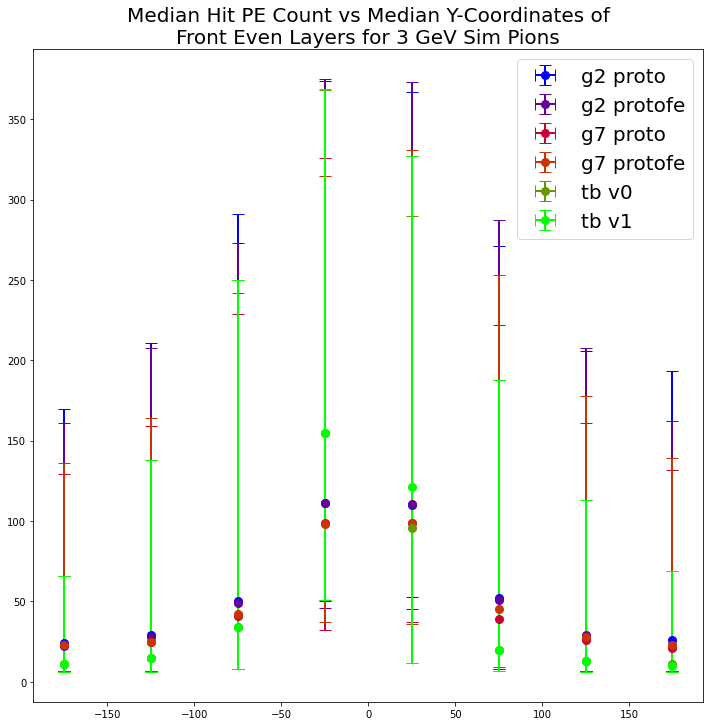

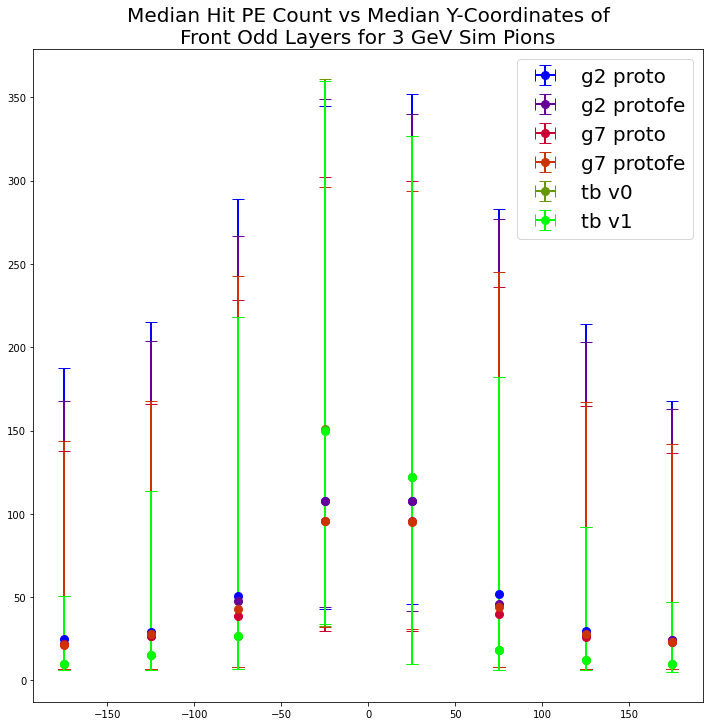

In [18]:
# profile plots for transverse coordinates
prof_plot([ycoords_p32proto_feven, ycoords_p32protofe_feven, ycoords_p37proto_feven, 
           ycoords_p37protofe_feven, xcoords_p3tb0_feven, xcoords_p3tb1_feven], [
           rechitPE_p32proto_feven, rechitPE_p32protofe_feven, rechitPE_p37proto_feven, 
           rechitPE_p37protofe_feven, rechitPE_p3tb0_feven, rechitPE_p3tb1_feven], ['g2 proto', 'g2 protofe',
           'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'], 
           title='Median Hit PE Count vs Median Y-Coordinates of\nFront Even Layers for 3 GeV Sim Pions', 
           bins=np.linspace(-176, 176, 9), colors='brg')

prof_plot([xcoords_p32proto_fodd, xcoords_p32protofe_fodd, xcoords_p37proto_fodd, 
           xcoords_p37protofe_fodd, ycoords_p3tb0_fodd, ycoords_p3tb1_fodd], [
           rechitPE_p32proto_fodd, rechitPE_p32protofe_fodd, rechitPE_p37proto_fodd, 
           rechitPE_p37protofe_fodd, rechitPE_p3tb0_fodd, rechitPE_p3tb1_fodd], ['g2 proto', 'g2 protofe',
           'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'], 
           title='Median Hit PE Count vs Median Y-Coordinates of\nFront Odd Layers for 3 GeV Sim Pions', 
           bins=np.linspace(-176, 176, 9), colors='brg')

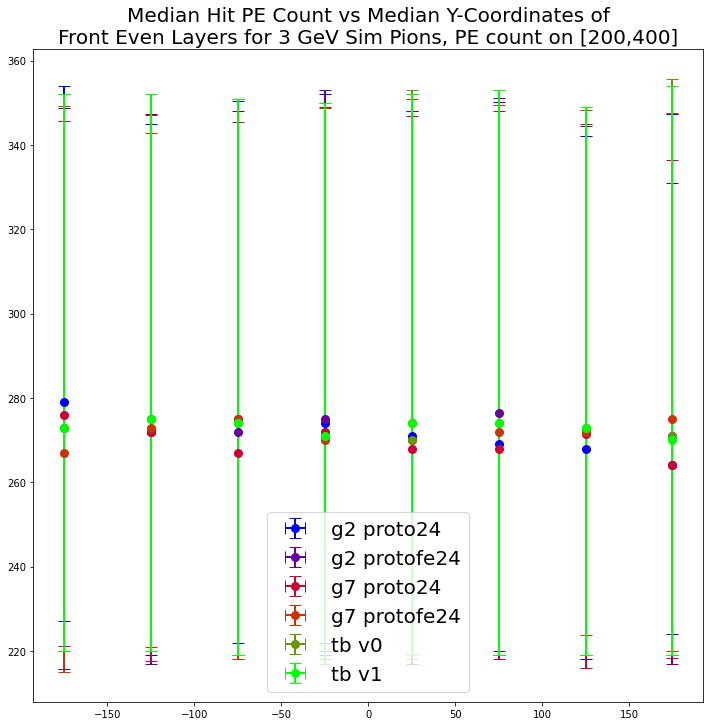

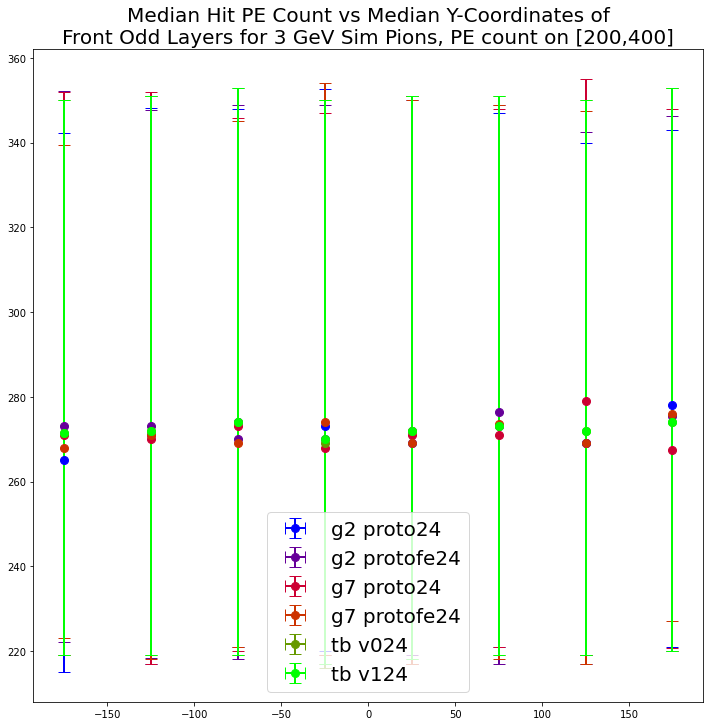

In [19]:
# profile plots for transverse coordinates, PE count on [200,400]
prof_plot([ycoords_p32proto24_feven, ycoords_p32protofe24_feven, ycoords_p37proto24_feven, 
           ycoords_p37protofe24_feven, xcoords_p3tb024_feven, xcoords_p3tb124_feven], [
           rechitPE_p32proto24_feven, rechitPE_p32protofe24_feven, rechitPE_p37proto24_feven, 
           rechitPE_p37protofe24_feven, rechitPE_p3tb024_feven, rechitPE_p3tb124_feven], ['g2 proto24', 'g2 protofe24',
           'g7 proto24', 'g7 protofe24', 'tb v0', 'tb v1'], 
           title='Median Hit PE Count vs Median Y-Coordinates of\nFront Even Layers for 3 GeV Sim Pions, PE count on [200,400]', 
           bins=np.linspace(-176, 176, 9), colors='brg')

prof_plot([xcoords_p32proto24_fodd, xcoords_p32protofe24_fodd, xcoords_p37proto24_fodd, 
           xcoords_p37protofe24_fodd, ycoords_p3tb024_fodd, ycoords_p3tb124_fodd], [
           rechitPE_p32proto24_fodd, rechitPE_p32protofe24_fodd, rechitPE_p37proto24_fodd, 
           rechitPE_p37protofe24_fodd, rechitPE_p3tb024_fodd, rechitPE_p3tb124_fodd], ['g2 proto24', 'g2 protofe24',
           'g7 proto24', 'g7 protofe24', 'tb v024', 'tb v124'], 
           title='Median Hit PE Count vs Median Y-Coordinates of\nFront Odd Layers for 3 GeV Sim Pions, PE count on [200,400]', 
           bins=np.linspace(-176, 176, 9), colors='brg')

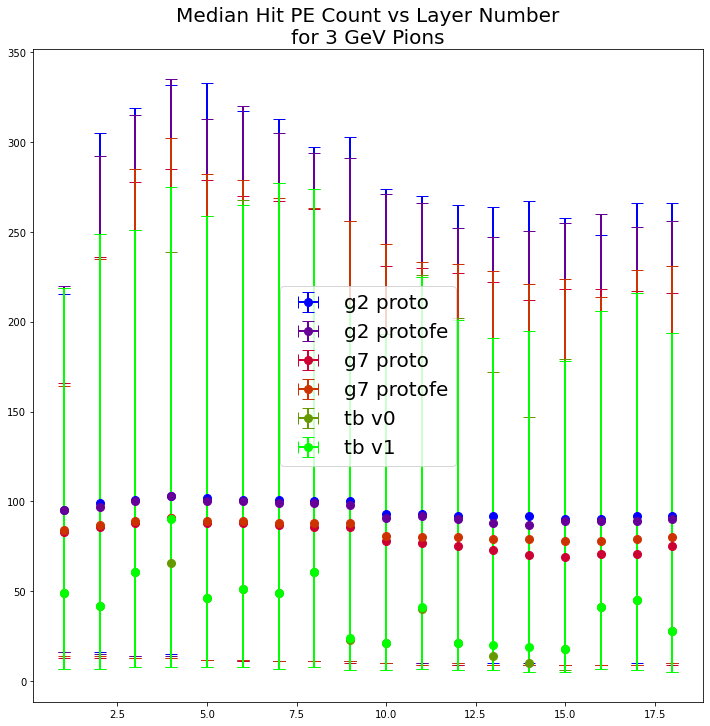

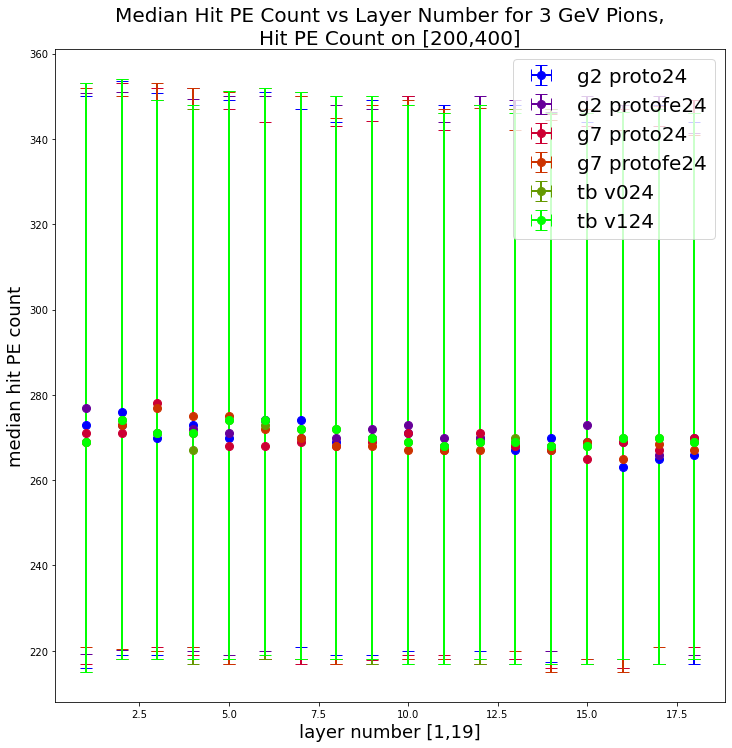

In [20]:
# profile plots for depth coordinates
prof_plot([layernum_p32proto, layernum_p32protofe, layernum_p37proto, 
           layernum_p37protofe, layernum_p3tb0, layernum_p3tb1], [
           rechitPE_p32proto, rechitPE_p32protofe, rechitPE_p37proto, 
           rechitPE_p37protofe, rechitPE_p3tb0, rechitPE_p3tb1], ['g2 proto', 'g2 protofe',
           'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'], 
           title='Median Hit PE Count vs Layer Number\nfor 3 GeV Pions', 
           bins=np.linspace(1, 19, 19), colors='brg')

# include in presentation - showing the trend we want to see (although this is obvious from the hit PE histogram)
prof_plot([layernum_p32proto24, layernum_p32protofe24, layernum_p37proto24, 
           layernum_p37protofe24, layernum_p3tb024, layernum_p3tb124],
          [rechitPE_p32proto24, rechitPE_p32protofe24, rechitPE_p37proto24, 
           rechitPE_p37protofe24, rechitPE_p3tb024, rechitPE_p3tb124], ['g2 proto24', 'g2 protofe24',
           'g7 proto24', 'g7 protofe24', 'tb v024', 'tb v124'], 
           title='Median Hit PE Count vs Layer Number for 3 GeV Pions,\nHit PE Count on [200,400]', 
           bins=np.linspace(1, 19, 19), colors='brg', xlabel='layer number [1,19]', ylabel='median hit PE count')

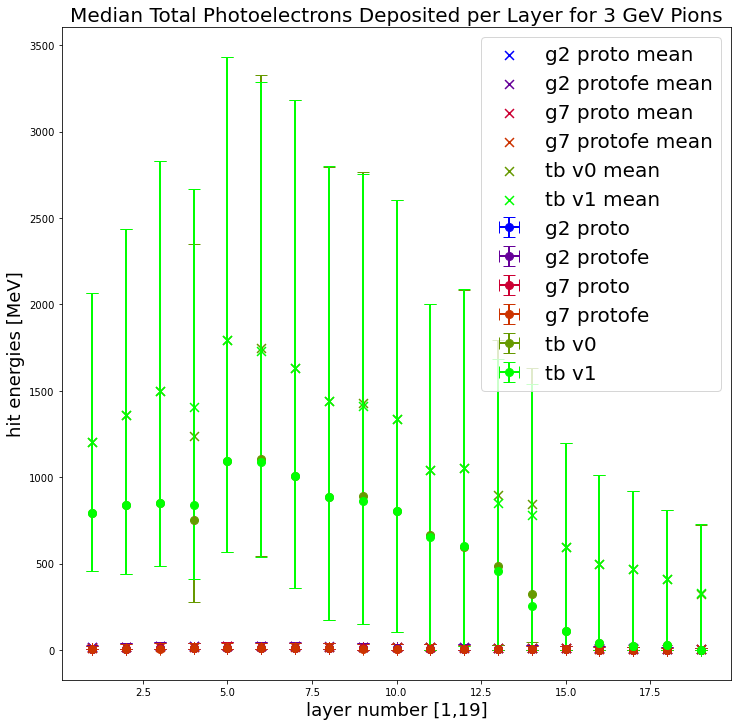

In [21]:
# total PE profile plot
meds, qlows, qhighs, means = prof_prep([binenergy_p32proto, binenergy_p32protofe, binenergy_p37proto, 
                                        binenergy_p37protofe, binenergy_p3tb0, binenergy_p3tb1])

ms_qs_graph(meds, qlows, qhighs, ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'],
            title='Median Total Photoelectrons Deposited per Layer for 3 GeV Pions', 
            xlabel='layer number [1,19]', ylabel='hit energies [MeV]', cross=means,
            colors='brg')

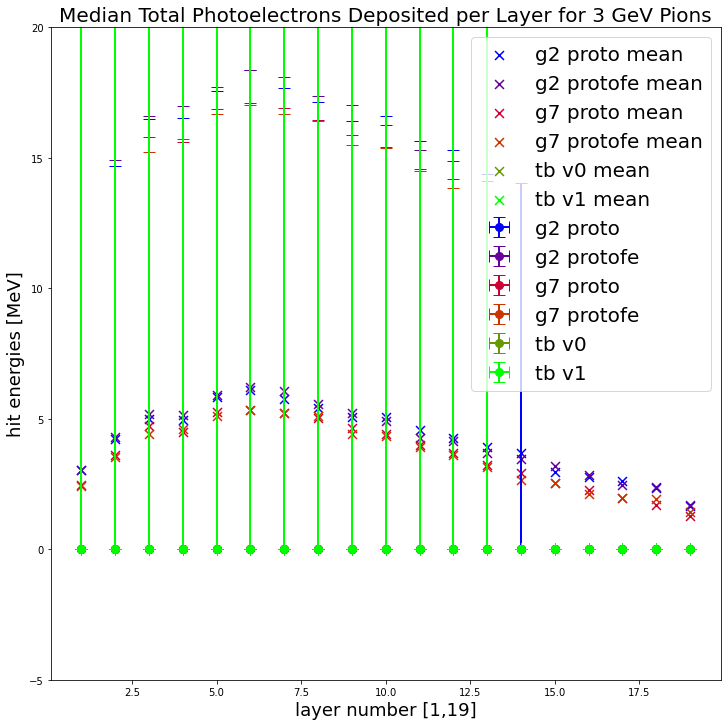

In [22]:
# total PE profile plot, PE count on [200,400]
meds, qlows, qhighs, means = prof_prep([binenergy_p32proto24, binenergy_p32protofe24, binenergy_p37proto24, 
                                        binenergy_p37protofe24, binenergy_p3tb024, binenergy_p3tb124])

ms_qs_graph(meds, qlows, qhighs, ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'],
            title='Median Total Photoelectrons Deposited per Layer for 3 GeV Pions', 
            xlabel='layer number [1,19]', ylabel='hit energies [MeV]', cross=means,
            colors='brg', ylim=(-5,20))

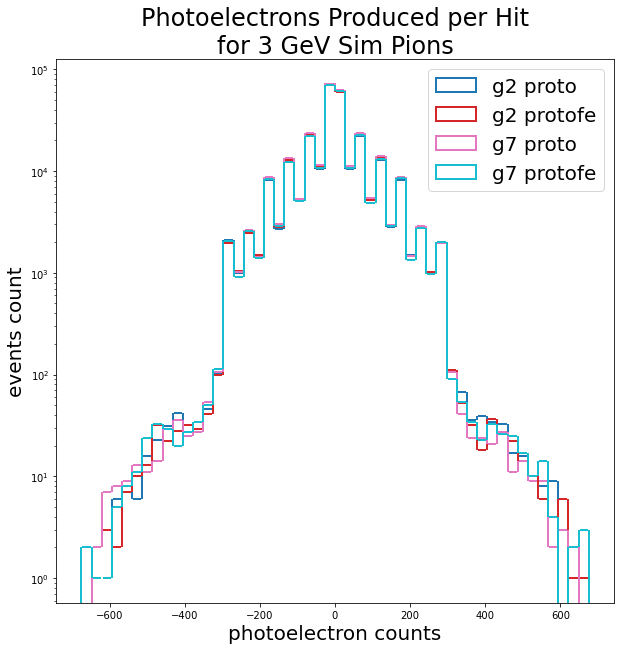

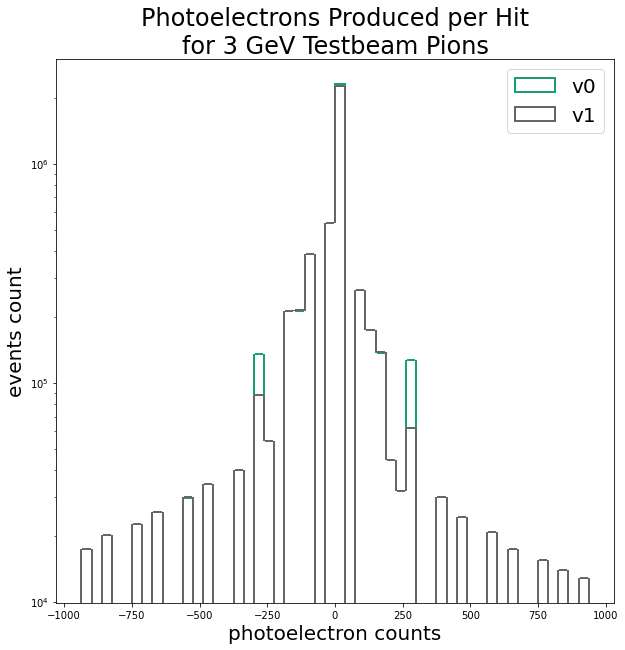

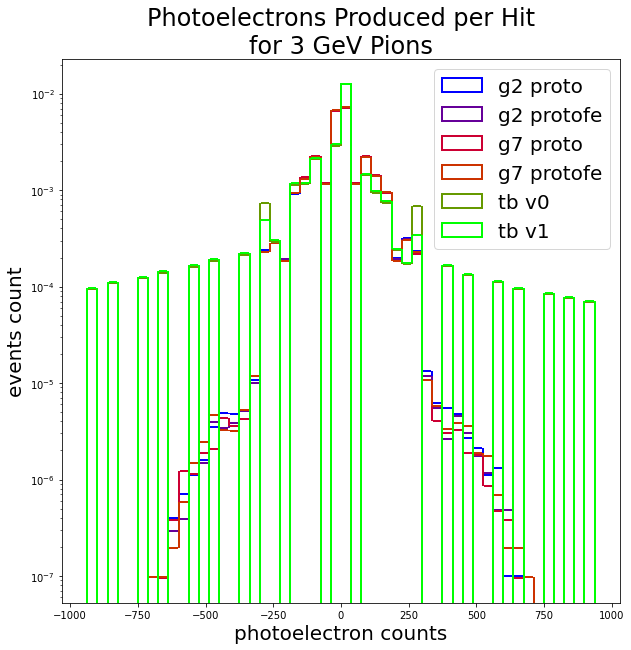

In [23]:
# photoelectrons produced per hit
b = calc_bins_multi([xcoords_p32proto, xcoords_p32protofe, xcoords_p37proto, xcoords_p37protofe], nbins=50)

hists([xcoords_p32proto, xcoords_p32protofe, xcoords_p37proto, xcoords_p37protofe], 
      'Photoelectrons Produced per Hit\nfor 3 GeV Sim Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe'], nbins=b, xlabel='photoelectron counts',
      ylabel='events count', yscale='log')

b = calc_bins_multi([xcoords_p3tb0, xcoords_p3tb1], nbins=50)

hists([xcoords_p3tb0, xcoords_p3tb1], 
      'Photoelectrons Produced per Hit\nfor 3 GeV Testbeam Pions', 
      ['v0', 'v1'], nbins=b, xlabel='photoelectron counts',
      ylabel='events count', colors='Dark2', yscale='log')

b = calc_bins_multi([xcoords_p32proto, xcoords_p32protofe, xcoords_p37proto, 
                     xcoords_p37protofe, xcoords_p3tb0, xcoords_p3tb1], nbins=50)

hists([xcoords_p32proto, xcoords_p32protofe, xcoords_p37proto, xcoords_p37protofe, xcoords_p3tb0, xcoords_p3tb1], 
      'Photoelectrons Produced per Hit\nfor 3 GeV Pions', 
      ['g2 proto', 'g2 protofe', 'g7 proto', 'g7 protofe', 'tb v0', 'tb v1'], nbins=b, 
      xlabel='photoelectron counts', ylabel='events count', colors='brg', density=True, yscale='log')